## Problem

In this project, we delve deep into the thriving sector of **online retail** by analyzing a transactional dataset from a **UK-based retailer**, available at the **UCI Machine Learning Repository**. This dataset documents all transactions between **2010 and 2011**.

Our primary objective is to **amplify the efficiency of marketing strategies and boost sales through customer segmentation**. We aim to transform the transactional data into a **customer-centric dataset** by creating new features that will facilitate the segmentation of customers into distinct groups using the **K-means clustering algorithm**.

This segmentation will allow us to understand the **distinct profiles and preferences of different customer groups**. Building upon this, we intend to develop a **recommendation system** that will suggest **top-selling products** to customers within each segment who haven't purchased those items yet — ultimately enhancing **marketing efficacy** and fostering **increased sales**.


==========================================================================================
## Objectives

- **Data Cleaning & Transformation**:  
  Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.

- **Feature Engineering**:  
  Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.

- **Data Preprocessing**:  
  Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.

- **Customer Segmentation using K-Means Clustering**:  
  Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.

- **Cluster Analysis & Evaluation**:  
  Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.

- **Recommendation System**:  
  Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.


## Importing Necessary Libraries

First of all, I will import all the necessary libraries that we will use throughout the project.  
This generally includes libraries for **data manipulation**, **data visualization**, and others based on the specific needs of the project:


In [4]:
# Ignore warnings
import warnings   # Suppress warnings
warnings.filterwarnings('ignore')   # Ignore all warnings

# Basic Libraries
import numpy as np   # Numerical computations
import pandas as pd  # Data manipulation and analysis

# Visualization Libraries
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting graphs and figures
import matplotlib.gridspec as gridspec  # Fine-tuned subplot layout
import plotly.graph_objects as go  # Interactive visualizations
from matplotlib.colors import LinearSegmentedColormap  # Custom color maps for matplotlib
from matplotlib import colors as mcolors  # Color utilities for matplotlib

# Statistical Tools
from scipy.stats import linregress  # Linear regression statistics

# Outlier Detection
from sklearn.ensemble import IsolationForest  # Detecting anomalies/outliers

# Data Preprocessing
from sklearn.preprocessing import StandardScaler  # Standardize features
from sklearn.decomposition import PCA  # Dimensionality reduction using PCA

# Clustering Visualization
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer  # Visual tools for clustering evaluationfrom sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Clustering Metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score  # Clustering evaluation metrics

# Clustering Algorithm
from sklearn.cluster import KMeans  # KMeans clustering algorithm

# Utility Libraries
from tabulate import tabulate  # Format output as tables
from collections import Counter  # Count hashable objects

# Jupyter Notebook Configuration
%matplotlib inline

In [5]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode  # Enable Plotly to run in offline mode
init_notebook_mode(connected=True)  # Initialize Plotly to display plots within the notebook

In [6]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

## Loading the Dataset

Next, I will load the dataset into a **pandas DataFrame**, which will facilitate easy manipulation and analysis.


In [8]:
df = pd.read_csv('data.csv', encoding="ISO-8859-1")

## Preliminary Data Analysis

First, I will perform a **preliminary analysis** to understand the structure and types of data columns.  
This step gives an overview of the dataset's shape, column names, data types, and presence of null values.


In [10]:
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  12-01-2010 08:26       2.55     17850.0  United Kingdom  
1  12-01-2010 08:26       3.39     17850.0  United Kingdom  
2  12-01-2010 08:26       2.75     17850.0  United Kingdom  
3  12-01-2010 08:26       3.39     17850.0  United Kingdom  
4  12-01-2010 08:26       3.39     17850.0  United Kingdom  
5  12-01-2010 08:26       7.65     17850.0  United Kingdom  
6  12-01-2010 08:26       4.25     17850.0  United Kingdom  
7  12-01-2010 08:28       1.85     17850.0  United Kingdom  
8  12-01-2010 08:28       1.85     17850.0  United Kingdom  
9  12-01-2010 08:34       1.69     13047.0  United Kingdom

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Inferences

The dataset consists of **541,909 entries** and **8 columns**. Here is a brief overview of each column:

- **InvoiceNo**:  
  Object data type column containing the invoice number for each transaction.  
  Each invoice number may represent multiple items in a single transaction.

- **StockCode**:  
  Object type column representing the product code for each item.

- **Description**:  
  Object type column containing descriptions of the products.  
  It has some missing values — **540,455 non-null entries** out of 541,909.

- **Quantity**:  
  Integer column indicating the quantity of products purchased in each transaction.

- **InvoiceDate**:  
  Datetime column that records the date and time of each transaction.

- **UnitPrice**:  
  Float column representing the unit price of each product.

- **CustomerID**:  
  Float column containing the customer ID for each transaction.  
  It has **a significant number of missing values**, with only **406,829 non-null entries**.

- **Country**:  
  Object column recording the country in which each transaction took place.

---

From a preliminary overview:

- There are missing values in the **Description** and **CustomerID** columns that need to be addressed.
- The **InvoiceDate** column is already in datetime format, which will be helpful for time-based analysis.
- Multiple entries with the same **CustomerID** suggest that a single customer can have multiple transactions.

---

### 🔜 Next Steps:
The upcoming steps will include deeper **data cleaning and preprocessing** to:
- Handle missing values
- Remove potentially erroneous data
- Create new features for clustering and recommendation


## Summary Statistics

Now, I am going to generate **summary statistics** to gain initial insights into the distribution and characteristics of the data.  
This will help identify any anomalies, skewness, or outliers in the numerical columns.


In [14]:
# Summary statistics for numerical variables
df.describe().T

count          mean          std       min       25%       50%  \
Quantity    541909.0      9.552250   218.081158 -80995.00      1.00      3.00   
UnitPrice   541909.0      4.611114    96.759853 -11062.06      1.25      2.08   
CustomerID  406829.0  15287.690570  1713.600303  12346.00  13953.00  15152.00   

                 75%      max  
Quantity       10.00  80995.0  
UnitPrice       4.13  38970.0  
CustomerID  16791.00  18287.0

In [15]:
# Summary statistics for categorical variables
df.describe(include='object').T

count unique                                 top    freq
InvoiceNo    541909  25900                              573585    1114
StockCode    541909   4070                              85123A    2313
Description  540455   4223  WHITE HANGING HEART T-LIGHT HOLDER    2369
InvoiceDate  541909  23260                    10/31/2011 14:41    1114
Country      541909     38                      United Kingdom  495478

## Inferences from Summary Statistics

### Quantity:
- The **average quantity** of products in a transaction is approximately **9.55**.
- The quantity ranges from **-80995 to 80995**.  
  Negative values indicate **returned or cancelled orders**, which need to be handled appropriately.
- The **standard deviation is large**, indicating significant spread in the data.
- The large difference between the **maximum and the 75th percentile** suggests the presence of **outliers**.

### UnitPrice:
- The **average unit price** is approximately **4.61**.
- The unit price ranges from **-11062.06 to 38970**, indicating potential **data entry errors** or noise (since negative prices are invalid).
- Similar to Quantity, **outliers are present**, as seen from the large difference between the max and upper quartile.

### CustomerID:
- There are **406,829 non-null entries**, meaning a significant number of **missing values** exist.
- Customer IDs range from **12346 to 18287**, representing **unique customers**.

### InvoiceNo:
- There are **25,900 unique invoice numbers**, indicating 25,900 separate transactions.
- The most frequent invoice number is **573585**, appearing **1,114 times**, possibly reflecting a **large or split order**.

### StockCode:
- There are **4,070 unique stock codes**, each representing a **distinct product**.
- The most frequent stock code is **85123A**, appearing **2,313 times**.

### Description:
- The dataset includes **4,223 unique product descriptions**.
- The most frequent product is **"WHITE HANGING HEART T-LIGHT HOLDER"**, appearing **2,369 times**.
- There are **missing values** in this column that need to be **cleaned or imputed**.

### Country:
- Transactions originate from **38 different countries**.
- The **United Kingdom** dominates the dataset, accounting for approximately **91.4%** of all transactions.


## Step 3 | Data Cleaning & Transformation

This step encompasses a comprehensive **cleaning and transformation process** to refine the dataset.  
It includes addressing **missing values**, eliminating **duplicate entries**, correcting **anomalies** in product codes and descriptions, and other necessary adjustments to prepare the data for **in-depth analysis and modeling**.

---

### Step 3.1 | Handling Missing Values

Initially, I will determine the **percentage of missing values** present in each column,  
followed by selecting the most effective strategy to address them.


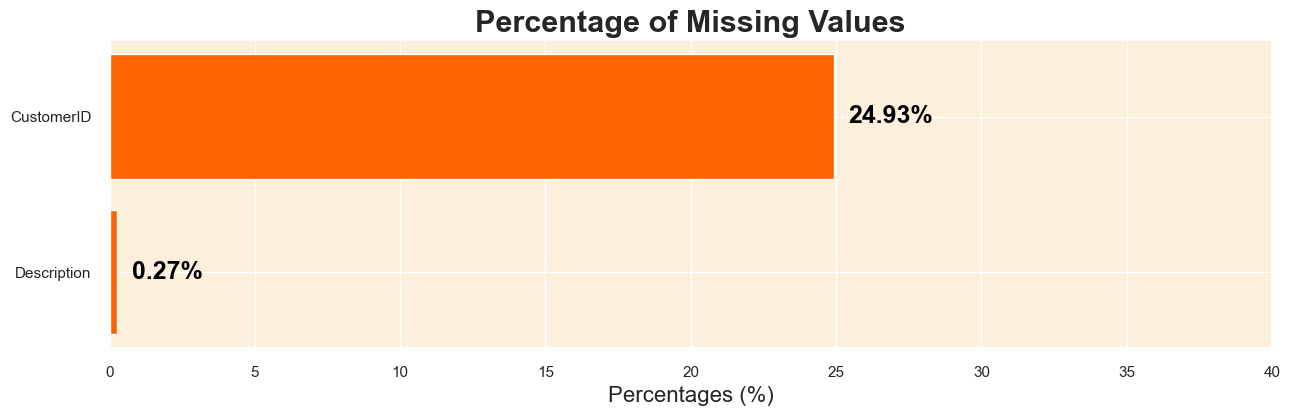

In [18]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

### Step 3.1.2 | Handling Missing Values Strategy

#### CustomerID (24.93% missing values):
- The `CustomerID` column has nearly **25% missing data**.
- Since this column is **critical for customer clustering and recommendations**, imputing it could introduce **bias**.
- To maintain the integrity of the analysis, the best strategy is to **remove rows with missing CustomerIDs**.

#### Description (0.27% missing values):
- The `Description` column has a **very small percentage** of missing values.
- However, inconsistencies exist: the **same StockCode may have different Descriptions**.
- Imputing based on StockCode would not be reliable.
- Therefore, we will **drop rows with missing Descriptions** to avoid inconsistencies.

> By removing rows with missing values in both `CustomerID` and `Description`, we ensure a **cleaner and more reliable dataset** for clustering and recommendations.


In [20]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns
df[df['CustomerID'].isnull() | df['Description'].isnull()].head()

InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

           InvoiceDate  UnitPrice  CustomerID         Country  
622   12-01-2010 11:52       0.00         NaN  United Kingdom  
1443  12-01-2010 14:32       2.51         NaN  United Kingdom  
1444  12-01-2010 14:32       2.51         NaN  United Kingdom  
1445  12-01-2010 14:32       0.85         NaN  United Kingdom  
1446  12-01-2010 14:32       1.66         NaN  United Kingdom

In [21]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['CustomerID', 'Description'])

In [22]:
# Verifying the removal of missing values
df.isnull().sum().sum()

0

### Step 3.2 | Handling Duplicates

Next, I am going to identify and handle **duplicate rows** in the dataset.  
Duplicates can lead to **biased analysis and skewed clustering**, so it's important to detect and remove them to maintain data quality.
``


In [24]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

InvoiceNo StockCode                       Description  Quantity  \
494    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
485    536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
539    536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
527    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
521    536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
537    536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
578    536412     21448         12 DAISY PEGS IN WOOD BOX         1   
598    536412     21448         12 DAISY PEGS IN WOOD BOX         1   

          InvoiceDate  UnitPrice  CustomerID         Country  
494  12-01-2010 11:45       1.25     17908.0  United Kingdom  
517  12-01-2010 11:45       1.25     17908.0  United Kingdom  
485  12-01-2010 11:45       4.95     17908.0  United Kingdom  
539  12-01-2010 11:45       4.95     17908.0  United Kingdom  
489  12-01-2010 11:45       2.10     17908.0  United Kingdom  
527  12-01-2010 11:45       2.10     17908.0  United Kingdom  
521  12-01-2010 11:45       2.95     17908.0  United Kingdom  
537  12-01-2010 11:45       2.95     17908.0  United Kingdom  
578  12-01-2010 11:49       1.65     17920.0  United Kingdom  
598  12-01-2010 11:49       1.65     17920.0  United Kingdom

### Step 3.2.1 | Handling Duplicates Strategy

In the context of this project, the presence of completely identical rows, including identical transaction times, suggests that these might be data recording errors rather than genuine repeated transactions. Keeping these duplicate rows can introduce noise and potential inaccuracies in the clustering and recommendation system.

Therefore, I am going to remove these completely identical duplicate rows from the dataset. Removing these rows will help in achieving a cleaner dataset, which in turn would aid in building more accurate customer clusters based on their unique purchasing behaviors. Moreover, it would help in creating a more precise recommendation system by correctly identifying the products with the most purchases.


In [26]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 5225 duplicate rows that need to be removed.


In [27]:
# Getting the number of rows in the dataframe
df.shape[0]

401604

### Step 3.2 | Treating Cancelled Transactions

To refine our understanding of customer behavior and preferences, we need to take into account the transactions that were cancelled. Initially, we will identify these transactions by filtering the rows where the **InvoiceNo** starts with "C". Subsequently, we will analyze these rows to understand their common characteristics or patterns:

In [29]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

Quantity     UnitPrice
count   8872.000000   8872.000000
mean     -30.774910     18.899512
std     1172.249902    445.190864
min   -80995.000000      0.010000
25%       -6.000000      1.450000
50%       -2.000000      2.950000
75%       -1.000000      4.950000
max       -1.000000  38970.000000

### Inferences from the Cancelled Transactions Data:

- All quantities in the cancelled transactions are negative, indicating that these are indeed orders that were cancelled.
- The **UnitPrice** column has a considerable spread, showing that a variety of products, from low to high value, were part of the cancelled transactions.
ons.

### Strategy for Handling Cancelled Transactions:

Considering the project's objective to cluster customers based on their purchasing behavior and preferences and to eventually create a recommendation system, it's imperative to understand the cancellation patterns of customers. Therefore, the strategy is to retain these cancelled transactions in the dataset, marking them distinctly to facilitate further analysis. This approach will:

- Enhance the clustering process by incorporating patterns and trends observed in cancellation data, which might represent certain customer behaviors or preferences.
- Allow the recommendation system to possibly prevent suggesting products that have a high likelihood of being cancelled, thereby improving the quality of recommendations.

In [32]:
# Finding the percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


### Step 3.4 | Correcting StockCode Anomalies

First of all, let's examine the **number of unique StockCodes** in the dataset, and then **visualize the top 10 most frequent stock codes** along with their **percentage frequency**.  
This will help identify popular products and potential anomalies in the product codes.


In [34]:
# Finding the number of unique stock codes
unique_stock_codes = df['StockCode'].nunique()

# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3684


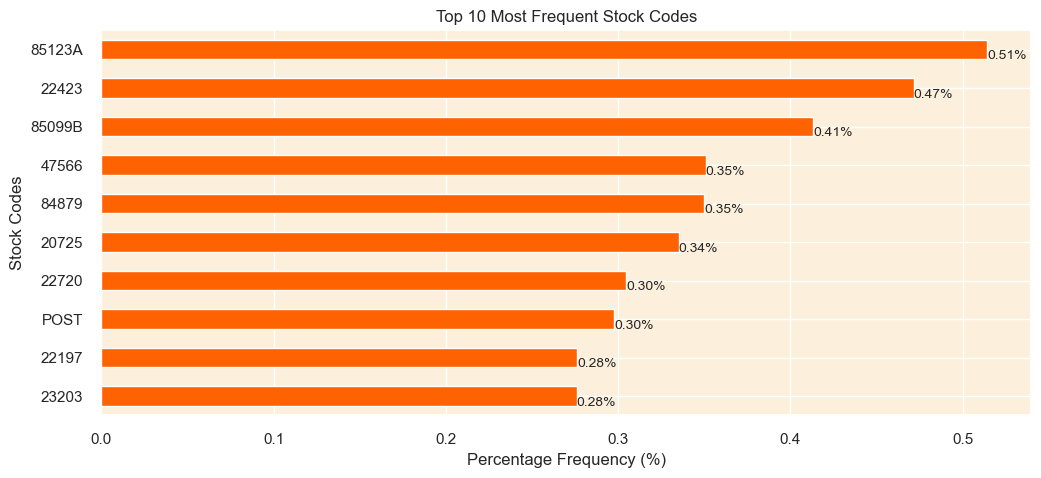

In [35]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

### Inferences on Stock Codes

- **Product Variety**: The dataset contains **3684 unique StockCodes**, indicating a **wide variety of products** sold in the store.  
  This diversity can help in **identifying distinct customer segments** based on preferences.

- **Popular Items**: The **top 10 most frequent StockCodes** reflect **popular products or categories** that are often purchased, useful for making targeted recommendations.

- **Stock Code Anomalies**:  We observe that while most stock codes are composed of 5 or 6 characters, there are some anomalies like the code 'POST'. These anomalies might represent services or non-product transactions (perhaps postage fees) rather than actual products. To maintain the focus of the project, which is clustering based on product purchases and creating a recommendation system, these anomalies should be further investigated and possibly treated appropriately to ensure data integrity.


To delve deeper into identifying these anomalies, let's explore the frequency of the number of numeric characters in the stock codes, which can provide insights into the nature of these unusual entries:

In [37]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
Name: count, dtype: int64


### Inference
The output indicates the following:
- A majority of the unique stock codes (3676 out of 3684) contain exactly 5 numeric characters, which seems to be the standard format for representing product codes in this dataset.

- There are a few anomalies: 7 stock codes contain no numeric characters and 1 stock code contains only 1 numeric character. These are clearly deviating from the standard format and need further investigation to understand their nature and whether they represent valid product transactions.


Now, let's identify the stock codes that contain 0 or 1 numeric characters to further understand these anomalies:

In [39]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


#### Let's calculate the percentage of records with these anomalous stock codes:

In [41]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


### Inference:
Based on the analysis, we find that a very small proportion of the records, **0.48%**, have anomalous stock codes, which deviate from the typical format observed in the majority of the data. Also, these anomalous codes are just a fraction among all unique stock codes (**only 8 out of 3684**).

These codes seem to represent non-product transactions like  `'BANK CHARGES'`,  `'POST'` (possibly postage fees), etc. Since they do not represent actual products and are a very small proportion of the dataset, including them in the analysis might introduce noise and distort the clustering and recommendation system.

### Strategy:
Given the context of the project, where the aim is to cluster customers based on their product purchasing behaviors and develop a product recommendation system, it would be prudent to exclude these records with anomalous stock codes from the dataset. This way, the focus remains strictly on genuine product transactions, which would lead to a more accurate and meaningful analysis.

Thus, the strategy would be to filter out and remove rows with these anomalous stock codes from the dataset before proceeding with further analysis and model development:

In [44]:
# Removing rows with anomalous stock codes from the dataset
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [45]:
# Getting the number of rows in the dataframe
df.shape[0]

399689

### Step 3.5 | Cleaning Description Column

First, I will calculate the occurrence count of each unique description in the dataset. Then, I will plot the top 30 descriptions. This visualization will give a clear view of the highest occurring descriptions in the dataset:

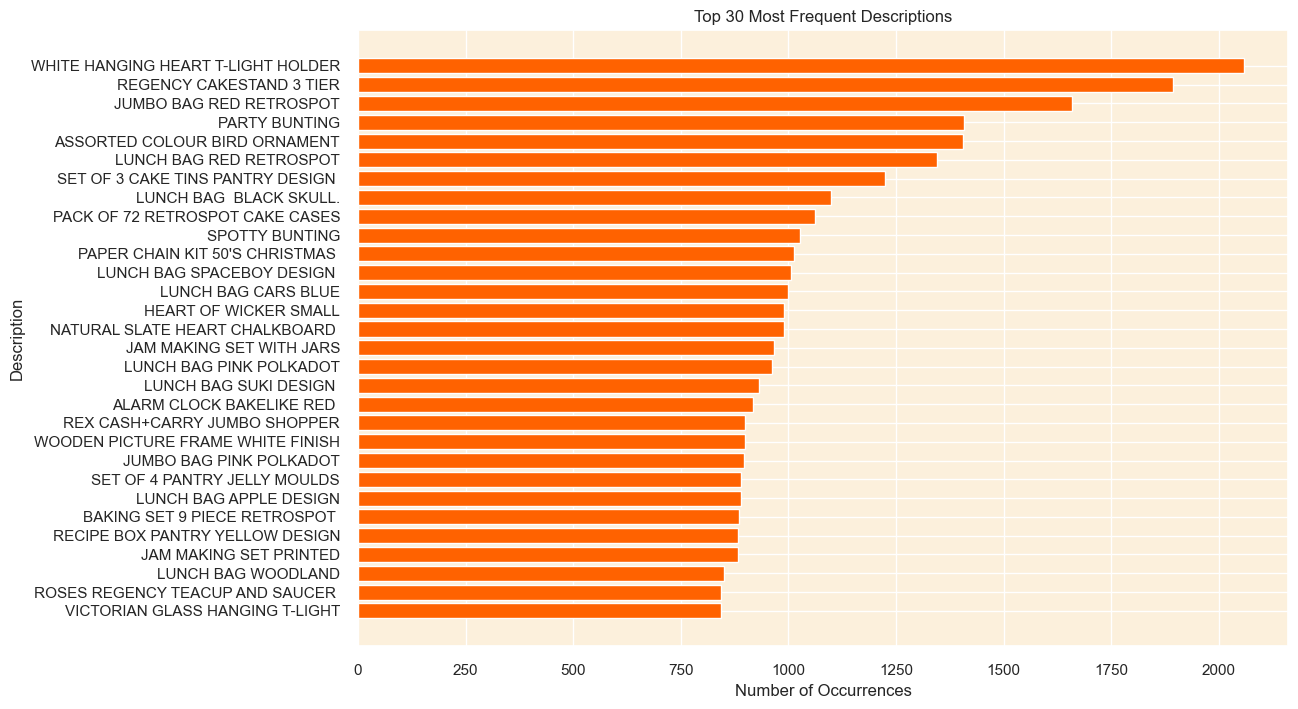

In [47]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Show the plot
plt.show()

### Inferences on Descriptions:

- The most frequent descriptions are generally household items, particularly those associated with kitchenware, lunch bags, and decorative items.

- Interestingly, all the descriptions are in uppercase, which might be a standardized format for entering product descriptions in the database. However, considering the inconsistencies and anomalies encountered in the dataset so far, it would be prudent to check if there are descriptions entered in lowercase or a mix of case styles.

In [49]:
# Find unique descriptions containing lowercase characters
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


### Inference:

- Upon reviewing the descriptions that contain lowercase characters, it is evident that some entries are not product descriptions, such as **"Next Day Carriage"** and **"High Resolution Image"**. These entries seem to be unrelated to the actual products and might represent other types of information or service details.


### Strategy:

- **Step 1**: Remove the rows where the descriptions contain service-related information like **"Next Day Carriage"** and **"High Resolution Image"**, as these do not represent actual products and would not contribute to the clustering and recommendation system we aim to build.

- **Step 2**: For the remaining descriptions with mixed case, standardize the text to uppercase to maintain uniformity across the dataset. This will also assist in reducing the chances of having duplicate entries with different case styles.

By implementing the above strategy, we can enhance the quality of our dataset, making it more suitable for the analysis and modeling phases of our project.

In [51]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculate the percentage of records with service-related descriptions
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

# Print the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

# Remove rows with service-related information in the description
df = df[~df['Description'].isin(service_related_descriptions)]

# Standardize the text to uppercase to maintain uniformity across the dataset
df['Description'] = df['Description'].str.upper()

The percentage of records with service-related descriptions in the dataset is: 0.02%


In [52]:
# Getting the number of rows in the dataframe
df.shape[0]

399606

### Step 3.6 | Treating Zero Unit Prices

In this step, first I am going to take a look at the statistical description of the ''UnitPrice'' column:

In [54]:
df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

### Inference:

The minimum unit price value is zero. This suggests that there are some transactions where the unit price is zero, potentially indicating a free item or a data entry error. To understand their nature, it is essential to investigate these zero unit price transactions further. A detailed analysis of the product descriptions associated with zero unit prices will be conducted to determine if they adhere to a specific pattern:

In [56]:
df[df['UnitPrice']==0].describe()[['Quantity']]

Quantity
count     33.000000
mean     420.515152
std     2176.713608
min        1.000000
25%        2.000000
50%       11.000000
75%       36.000000
max    12540.000000

### Inferences on UnitPrice

- The transactions with a unit price of zero are relatively few in number (33 transactions).  
- These transactions have a large variability in the quantity of items involved, ranging from 1 to 12540, with a substantial standard deviation.  
- Including these transactions in the clustering analysis might introduce noise and could potentially distort the customer behavior patterns identified by the clustering algorithm.



### Strategy

Given the small number of these transactions and their potential to introduce noise in the data analysis, the strategy should be to remove these transactions from the dataset.  
This would help in maintaining a cleaner and more consistent dataset, which is essential for building an accurate and reliable clustering model and recommendation system.


In [58]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df['UnitPrice'] > 0]

### Step 3.7 | Outlier Treatment

In **K-means clustering**, the algorithm is sensitive to both the scale of data and the presence of outliers, as they can significantly influence the position of centroids, potentially leading to incorrect cluster assignments. However, considering the context of this project where the final goal is to understand customer behavior and preferences through K-means clustering, it would be more prudent to address the issue of outliers **after the feature engineering phase** where we create a customer-centric dataset. At this stage, the data is transactional, and removing outliers might eliminate valuable information that could play a crucial role in segmenting customers later on. Therefore, we will postpone the outlier treatment and proceed to the next stage for now.

In [60]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

In [61]:
# Getting the number of rows in the dataframe
df.shape[0]

399573

## Step 4 | Feature Engineering

In order to create a comprehensive customer-centric dataset for clustering and recommendation, the following features can be engineered from the available data:


### Step 4.1 | RFM Features

RFM is a method used for analyzing customer value and segmenting the customer base. It is an acronym that stands for:

**Recency (R)**: This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.  
**Frequency (F)**: This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.  
**Monetary (M)**: This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.

Together, these metrics help in understanding a customer's buying behavior and preferences, which is pivotal in personalizing marketing strategies and creating a recommendation system.


### Step 4.1.1 | Recency (R)

In this step, we focus on understanding how recently a customer has made a purchase. This is a crucial aspect of customer segmentation as it helps in identifying the engagement level of customers. Here, I am going to define the following feature:

**Days Since Last Purchase**: This feature represents the number of days that have passed since the customer's last purchase. A lower value indicates that the customer has purchased recently, implying a higher engagement level with the business, whereas a higher value may indicate a lapse or decreased engagement. By understanding the recency of purchases, businesses can tailor their marketing strategies to re-engage customers who have not made purchases in a while, potentially increasing customer retention and fostering loyalty.
y.ency (R)

In [64]:
# Convert InvoiceDate to datetime (handles mixed formats)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed', errors='coerce')

# Check how many rows failed to convert
print("Unconverted rows:", df['InvoiceDate'].isna().sum())

# Convert InvoiceDate to datetime and extract only the date
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

Unconverted rows: 0


Now, **customer_data** dataframe contains the **Days_Since_Last_Purchase** feature:

In [66]:
customer_data.head()

CustomerID  Days_Since_Last_Purchase
0     12346.0                       325
1     12347.0                         2
2     12348.0                        75
3     12349.0                        18
4     12350.0                       310

#### Note:
I've named the customer-centric dataframe as customer_data, which will eventually contain all the customer-based features we plan to create.

### Step 4.1.2 | Frequency (F)

In this step, I am going to create two features that quantify the frequency of a customer's engagement with the retailer:

- **Total Transactions**: This feature represents the total number of transactions made by a customer. It helps in understanding the engagement level of a customer with the retailer.

- **Total Products Purchased**: This feature indicates the total number of products (sum of quantities) purchased by a customer across all transactions. It gives an insight into the customer's buying behavior in terms of the volume of products purchased.

These features will be crucial in segmenting customers based on their buying frequency, which is a key aspect in determining customer segments for targeted marketing and personalized recommendations.

In [69]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  
0                         0  
1                      2458  
2                      2332  
3                       630  
4                       196

### Step 4.1.3 | Monetary (M)

In this step, I am going to create two features that represent the monetary aspect of customer's transactions:

- **Total Spend**: This feature represents the total amount of money spent by each customer. It is calculated as the sum of the product of `UnitPrice` and `Quantity` for all transactions made by a customer. This feature is crucial as it helps in identifying the total revenue generated by each customer, which is a direct indicator of a customer's value to the business.

- **Average Transaction Value**: This feature is calculated as the **Total Spend** divided by the **Total Transactions** for each customer. It indicates the average value of a transaction carried out by a customer. This metric is useful in understanding the spending behavior of customers per transaction, which can assist in tailoring marketing strategies and offers to different customer segments based on their average spending patterns.

In [71]:
# Calculate the total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  
0                         0         0.00                   0.000000  
1                      2458      4310.00                 615.714286  
2                      2332      1437.24                 359.310000  
3                       630      1457.55                1457.550000  
4                       196       294.40                 294.400000

### Step 4.2 | Product Diversity

In this step, we are going to understand the diversity in the product purchase behavior of customers. Understanding product diversity can help in crafting personalized marketing strategies and product recommendations. Here, I am going to define the following feature:

**Unique Products Purchased**: This feature represents the number of distinct products bought by a customer. A higher value indicates that the customer has a diverse taste or preference, buying a wide range of products, while a lower value might indicate a focused or specific preference. Understanding the diversity in product purchases can help in segmenting customers based on their buying diversity, which can be a critical input in personalizing product recommendations.

In [73]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                   0.000000   
1                      2458      4310.00                 615.714286   
2                      2332      1437.24                 359.310000   
3                       630      1457.55                1457.550000   
4                       196       294.40                 294.400000   

   Unique_Products_Purchased  
0                          1  
1                        103  
2                         21  
3                         72  
4                         16

### Step 4.3 | Behavioral Features

In this step, we aim to understand and capture the shopping patterns and behaviors of customers. These features will give us insights into the customers' preferences regarding when they like to shop, which can be crucial information for personalizing their shopping experience. Here are the features I am planning to introduce:

- **Average Days Between Purchases**: This feature represents the average number of days a customer waits before making another purchase. Understanding this can help in predicting when the customer is likely to make their next purchase, which can be a crucial metric for targeted marketing and personalized promotions.

- **Favorite Shopping Day**: This denotes the day of the week when the customer shops the most. This information can help in identifying the preferred shopping days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the week.

- **Favorite Shopping Hour**: This refers to the hour of the day when the customer shops the most. Identifying the favorite shopping hour can aid in optimizing the timing of marketing campaigns and promotions to align with the times when different customer segments are most active.

By including these behavioral features in our dataset, we can create a more rounded view of our customers, which will potentially enhance the effectiveness of the clustering algorithm, leading to more meaningful customer segments.

In [75]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                   0.000000   
1                      2458      4310.00                 615.714286   
2                      2332      1437.24                 359.310000   
3                       630      1457.55                1457.550000   
4                       196       294.40                 294.400000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                        0.000000            0   
4                         16                        0.000000            2   

   Hour  
0    10  
1    14  
2    19  
3     9  
4    16

### Step 4.4 | BGeographic Features

In this step, we will introduce a geographic feature that reflects the geographical location of customers. Understanding the geographic distribution of customers is pivotal for several reasons:

- **Country**: This feature identifies the country where each customer is located. Including the country data can help us understand region-specific buying patterns and preferences. Different regions might have varying preferences and purchasing behaviors which can be critical in personalizing marketing strategies and inventory planning. Furthermore, it can be instrumental in logistics and supply chain optimization, particularly for an online retailer where shipping and delivery play a significant role.

In [77]:
df['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.890971
Germany           0.022722
France            0.020402
EIRE              0.018440
Spain             0.006162
Name: proportion, dtype: float64

### Inference:

Given that a substantial portion **(89**%) of transactions are originating from the** United Kingdo**m, we might consider creating a binary feature indicating whether the transaction is from the UK or not. This approach can potentially streamline the clustering process without losing critical geographical information, especially when considering the application of algorithms like K-means which are sensitive to the dimensionality of the feature space.

### Methodology:
First, I will group the data by` CustomerI`D and` Countr`y and calculate the number of transactions per country for each customer.

Next, I will identify the main country for each customer (the country from which they have the maximum transactions).

Then, I will create a binary column indicating whether the customer is from the UK or not.

Finally, I will merge this information with the customer_data dataframe to include the new feature in our analysis.

In [80]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data.head()


CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                   0.000000   
1                      2458      4310.00                 615.714286   
2                      2332      1437.24                 359.310000   
3                       630      1457.55                1457.550000   
4                       196       294.40                 294.400000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                        0.000000            0   
4                         16                        0.000000            2   

   Hour  Is_UK  
0    10      1  
1    14      0  
2    19      0  
3     9      0  
4    16      0

In [81]:
# Display feature distribution
customer_data['Is_UK'].value_counts()

Is_UK
1    3866
0     416
Name: count, dtype: int64

### Step 4.5 | Cancellation Insights

In this step, I am going to delve deeper into the cancellation patterns of customers to gain insights that can enhance our customer segmentation model. The features I am planning to introduce are:

- **Cancellation Frequency**: This metric represents the total number of transactions a customer has canceled. Understanding the frequency of cancellations can help us identify customers who are more likely to cancel transactions. This could be an indicator of dissatisfaction or other issues, and understanding this can help us tailor strategies to reduce cancellations and enhance customer satisfaction.

- **Cancellation Rate**: This represents the proportion of transactions that a customer has canceled out of all their transactions. This metric gives a normalized view of cancellation behavior. A high cancellation rate might be indicative of an unsatisfied customer segment. By identifying these segments, we can develop targeted strategies to improve their shopping experience and potentially reduce the cancellation rate.

By incorporating these cancellation insights into our dataset, we can build a more comprehensive view of customer behavior, which could potentially aid in creating more effective and nuanced customer segmentation.

In [83]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                   0.000000   
1                      2458      4310.00                 615.714286   
2                      2332      1437.24                 359.310000   
3                       630      1457.55                1457.550000   
4                       196       294.40                 294.400000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                        0.000000            0   
4                         16                        0.000000            2   

   Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  
0    10      1                     1.0                0.5  
1    14      0                     0.0                0.0  
2    19      0                     0.0                0.0  
3     9      0                     0.0                0.0  
4    16      0                     0.0                0.0

### Step 4.6 | Seasonality & Trends

In this step, I will delve into the seasonality and trends in customers' purchasing behaviors, which can offer invaluable insights for tailoring marketing strategies and enhancing customer satisfaction. Here are the features I am looking to introduce:

- **Monthly_Spending_Mean**: This is the average amount a customer spends monthly. It helps us gauge the general spending habit of each customer. A higher mean indicates a customer who spends more, potentially showing interest in premium products, whereas a lower mean might indicate a more budget-conscious customer.

- **Monthly_Spending_Std**: This feature indicates the variability in a customer's monthly spending. A higher value signals that the customer's spending fluctuates significantly month-to-month, perhaps indicating sporadic large purchases. In contrast, a lower value suggests more stable, consistent spending habits. Understanding this variability can help in crafting personalized promotions or discounts during periods they are expected to spend more.

- **Spending_Trend**: This reflects the trend in a customer's spending over time, calculated as the slope of the linear trend line fitted to their spending data. A positive value indicates an increasing trend in spending, possibly pointing to growing loyalty or satisfaction. Conversely, a negative trend might signal decreasing interest or satisfaction, highlighting a need for re-engagement strategies. A near-zero value signifies stable spending habits. Recognizing these trends can help in developing strategies to either maintain or alter customer spending patterns, enhancing the effectiveness of marketing campaigns.

By incorporating these detailed insights into our customer segmentation model, we can create more precise and actionable customer groups, facilitating the development of highly targeted marketing strategies and promotions.

In [85]:
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending 
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()


CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                   0.000000   
1                      2458      4310.00                 615.714286   
2                      2332      1437.24                 359.310000   
3                       630      1457.55                1457.550000   
4                       196       294.40                 294.400000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                        0.000000            0   
4                         16                        0.000000            2   

   Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0    10      1                     1.0                0.5   
1    14      0                     0.0                0.0   
2    19      0                     0.0                0.0   
3     9      0                     0.0                0.0   
4    16      0                     0.0                0.0   

   Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0               0.000000              0.000000        0.000000  
1             615.714286            341.070789        4.486071  
2             359.310000            203.875689     -100.884000  
3            1457.550000              0.000000        0.000000  
4             294.400000              0.000000        0.000000

So far, We have created a dataset that focuses on our customers, using a variety of new features that give us a deeper understanding of their buying patterns and preferences.

In [87]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()
customer_data.head(10)

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12346.0                       325                   2   
1    12347.0                         2                   7   
2    12348.0                        75                   4   
3    12349.0                        18                   1   
4    12350.0                       310                   1   
5    12352.0                        36                   8   
6    12353.0                       204                   1   
7    12354.0                       232                   1   
8    12355.0                       214                   1   
9    12356.0                        22                   3   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0          0.0                        0.0   
1                      2458       4310.0                 615.714286   
2                      2332      1437.24                     359.31   
3                       630      1457.55                    1457.55   
4                       196        294.4                      294.4   
5                       463      1265.41                  158.17625   
6                        20         89.0                       89.0   
7                       530       1079.4                     1079.4   
8                       240        459.4                      459.4   
9                      1573      2487.43                 829.143333   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                             0.0            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                             0.0            0   
4                         16                             0.0            2   
5                         57                         3.13253            1   
6                          4                             0.0            3   
7                         58                             0.0            3   
8                         13                             0.0            0   
9                         52                        5.315789            1   

   Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0    10      1                       1                0.5   
1    14      0                       0                0.0   
2    19      0                       0                0.0   
3     9      0                       0                0.0   
4    16      0                       0                0.0   
5    14      0                       1              0.125   
6    17      0                       0                0.0   
7    13      0                       0                0.0   
8    13      0                       0                0.0   
9     9      0                       0                0.0   

   Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0                    0.0                   0.0             0.0  
1             615.714286            341.070789        4.486071  
2                 359.31            203.875689        -100.884  
3                1457.55                   0.0             0.0  
4                  294.4                   0.0             0.0  
5               316.3525            134.700629           9.351  
6                   89.0                   0.0             0.0  
7                 1079.4                   0.0             0.0  
8                  459.4                   0.0             0.0  
9             829.143333            991.462585        -944.635

In [88]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   string 
 1   Days_Since_Last_Purchase        4282 non-null   Int64  
 2   Total_Transactions              4282 non-null   Int64  
 3   Total_Products_Purchased        4282 non-null   Int64  
 4   Total_Spend                     4282 non-null   Float64
 5   Average_Transaction_Value       4282 non-null   Float64
 6   Unique_Products_Purchased       4282 non-null   Int64  
 7   Average_Days_Between_Purchases  4282 non-null   Float64
 8   Day_Of_Week                     4282 non-null   Int32  
 9   Hour                            4282 non-null   Int32  
 10  Is_UK                           4282 non-null   Int64  
 11  Cancellation_Frequency          4282 non-null   Int64  
 12  Cancellation_Rate               42

### Customer Dataset Description

| **Variable**                    | **Description**                                                                                                                                                     |
|--------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `CustomerID`                   | Identifier uniquely assigned to each customer, used to distinguish individual customers.                                                                           |
| `Days_Since_Last_Purchase`    | The number of days that have passed since the customer's last purchase.                                                                                            |
| `Total_Transactions`          | The total number of transactions made by the customer.                                                                                                              |
| `Total_Products_Purchased`    | The total quantity of products purchased by the customer across all transactions.                                                                                  |
| `Total_Spend`                 | The total amount of money the customer has spent across all transactions.                                                                                           |
| `Average_Transaction_Value`   | The average value of the customer's transactions, calculated as total spend divided by the number of transactions.                                                  |
| `Unique_Products_Purchased`   | The number of different products the customer has purchased.                                                                                                        |
| `Average_Days_Between_Purchases` | The average number of days between consecutive purchases made by the customer.                                                                                   |
| `Day_Of_Week`                 | The day of the week when the customer prefers to shop, represented numerically (0 for Monday, 6 for Sunday).                                                       |
| `Hour`                        | The hour of the day when the customer prefers to shop, represented in a 24-hour format.                                                                             |
| `Is_UK`                       | A binary variable indicating whether the customer is based in the UK (1) or not (0).                                                                                |
| `Cancellation_Frequency`      | The total number of transactions that the customer has cancelled.                                                                                                   |
| `Cancellation_Rate`          | The proportion of transactions that the customer has cancelled, calculated as cancellation frequency divided by total transactions.                                |
| `Monthly_Spending_Mean`       | The average monthly spending of the customer.                                                                                                                       |
| `Monthly_Spending_Std`        | The standard deviation of the customer's monthly spending, indicating the variability in their spending pattern.                                                    |
| `Spending_Trend`              | A numerical representation of the trend in the customer's spending over time. A positive value indicates increasing trend, negative for decreasing, near zero for stable. |


Now that our dataset is ready, we can move on to the next steps of our project. This includes looking at our data more closely to find any patterns or trends, making sure our data is in the best shape by checking for and handling any outliers, and preparing our data for the clustering process. All of these steps will help us build a strong foundation for creating our customer segments and, eventually, a personalized recommendation system.

## Step 5 | Outlier Detection and Treatment

In this section, I will identify and handle outliers in our dataset. Outliers are data points that are significantly different from the majority of other points in the dataset. These points can potentially skew the results of our analysis, especially in k-means clustering where they can significantly influence the position of the cluster centroids. Therefore, it is essential to identify and treat these outliers appropriately to achieve more accurate and meaningful clustering results.

Given the multi-dimensional nature of the data, it would be prudent to use algorithms that can detect outliers in multi-dimensional spaces. I am going to use the Isolation Forest algorithm for this task. This algorithm works well for multi-dimensional data and is computationally efficient. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Let's proceed with this approach:

In [92]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12346.0                       325                   2   
1    12347.0                         2                   7   
2    12348.0                        75                   4   
3    12349.0                        18                   1   
4    12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0          0.0                        0.0   
1                      2458       4310.0                 615.714286   
2                      2332      1437.24                     359.31   
3                       630      1457.55                    1457.55   
4                       196        294.4                      294.4   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                             0.0            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                             0.0            0   
4                         16                             0.0            2   

   Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0    10      1                       1                0.5   
1    14      0                       0                0.0   
2    19      0                       0                0.0   
3     9      0                       0                0.0   
4    16      0                       0                0.0   

   Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  \
0                    0.0                   0.0             0.0   
1             615.714286            341.070789        4.486071   
2                 359.31            203.875689        -100.884   
3                1457.55                   0.0             0.0   
4                  294.4                   0.0             0.0   

   Outlier_Scores  Is_Outlier  
0               1           0  
1               1           0  
2               1           0  
3               1           0  
4               1           0

After applying the Isolation Forest algorithm, we have identified the outliers and marked them in a new column named `Is_Outlier`. We have also calculated the outlier scores which represent the anomaly score of each record.

Now let's visualize the distribution of these scores and the number of inliers and outliers detected by the model:

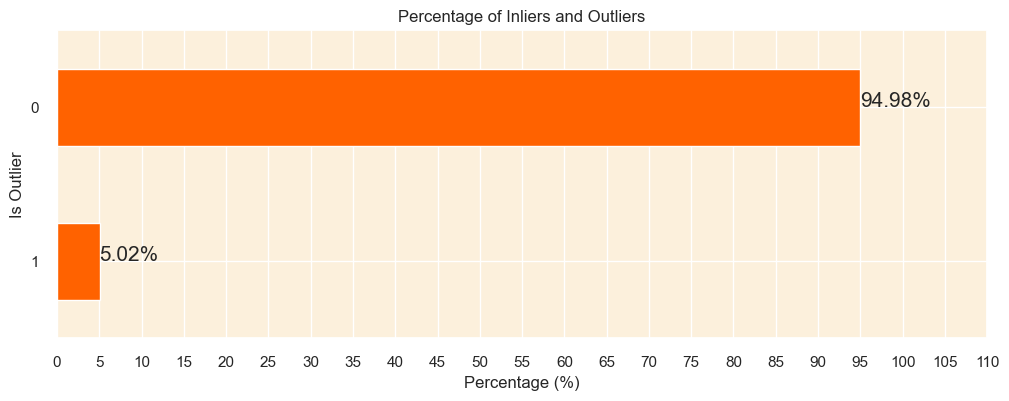

In [94]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

### Inference:
From the above plot, we can observe that about 5% of the customers have been identified as outliers in our dataset. This percentage seems to be a reasonable proportion, not too high to lose a significant amount of data, and not too low to retain potentially noisy data points. It suggests that our isolation forest algorithm has worked well in identifying a moderate percentage of outliers, which will be critical in refining our customer segmentation.

### Strategy:
Considering the nature of the project (customer segmentation using clustering), it is crucial to handle these outliers to prevent them from affecting the clusters' quality significantly. Therefore, I will separate these outliers for further analysis and remove them from our main dataset to prepare it for the clustering analysis

Let's proceed with the following steps:

- Separate the identified outliers for further analysis and save them as a separate file (optional). 
- Remove the outliers from the main dataset to prevent them from influencing the clustering process.  
- Drop the `Outlier_Scores` and `Is_Outlier` columns as they were auxiliary columns used for the outlier detection process.
.

In [97]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

We have successfully separated the outliers for further analysis and cleaned our main dataset by removing these outliers. This cleaned dataset is now ready for the next steps in our customer segmentation project, which includes scaling the features and applying clustering algorithms to identify distinct customer segments.

In [99]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

4067

## Step 6 | Correlation Analysis

Before we proceed to KMeans clustering, it's essential to check the correlation between features in our dataset. The presence of **multicollinearity**, where **features are highly correlated**, can potentially affect the clustering process by not allowing the model to learn the actual underlying patterns in the data, as the features do not provide unique information. This could lead to clusters that are not well-separated and meaningful.

If we identify multicollinearity, we can utilize dimensionality reduction techniques like PCA. These techniques help in neutralizing the effect of multicollinearity by transforming the correlated features into a new set of uncorrelated variables, preserving most of the original data's variance. This step not only enhances the quality of clusters formed but also makes the clustering process more computationally efficient.

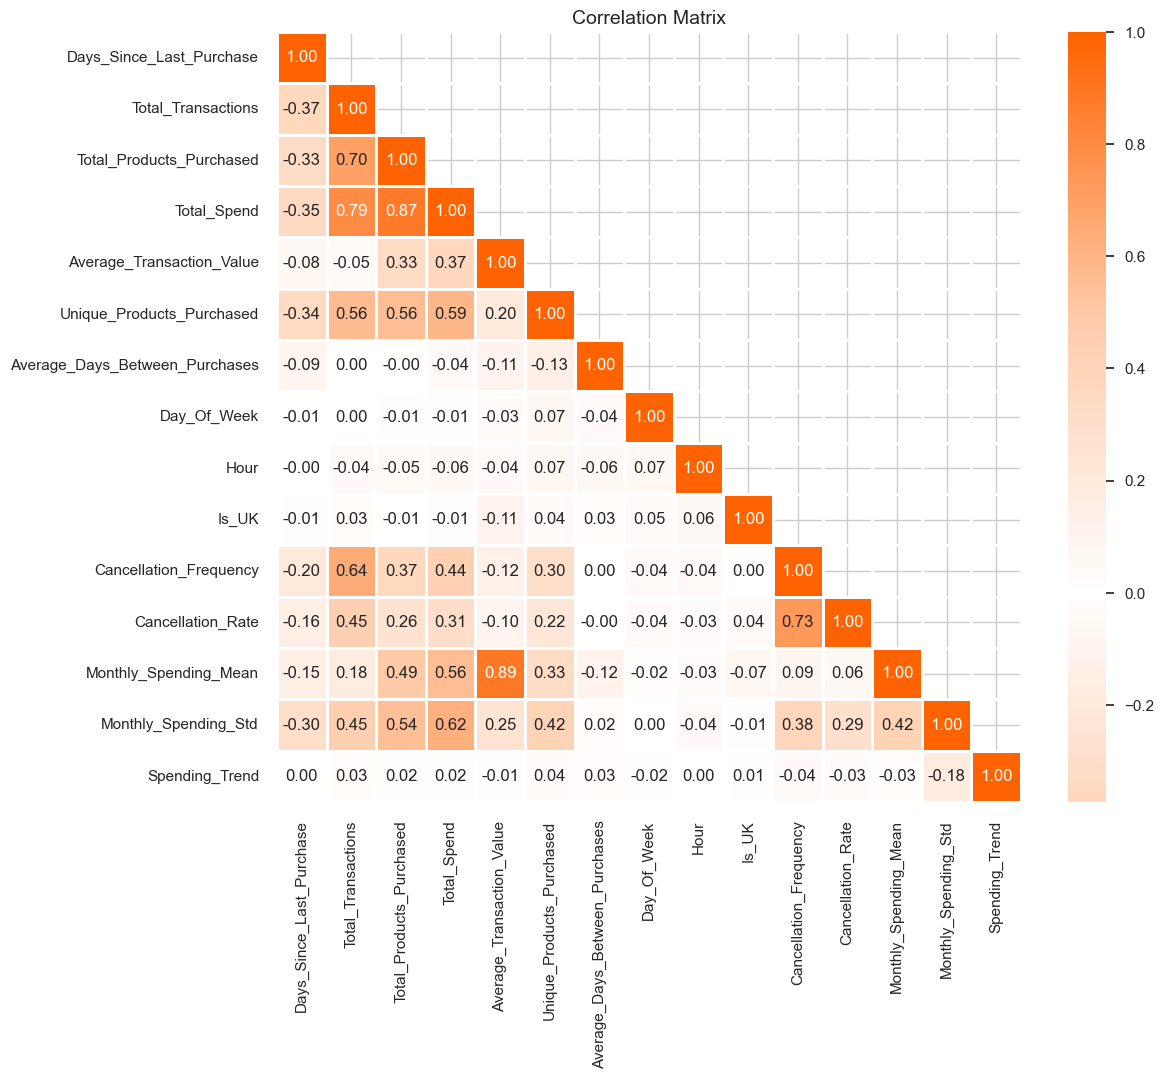

In [101]:
# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

### Inference:
Looking at the heatmap, we can see that there are some pairs of variables that have high correlations, for instance:


- Monthly_Spending_Mean and Average_Transaction_Value
- Total_Spend and Total_Products_Purchased
- 
Total_Transactions and Total_Spend  
-Cancellation_Rate and Cancellation_Frequency
- 
Total_Transactions and Total_Products_Purchased
These high correlations indicate that these variables move closely together, implying a degree of multicollinearity.

Before moving to the next steps, considering the impact of multicollinearity on KMeans clustering, it might be beneficial to treat this multicollinearity possibly through dimensionality reduction techniques such as PCA to create a set of uncorrelated variables. This will help in achieving more stable clusters during the KMeans clustering process..


## Step 7 | Feature Scaling

### Feature Scaling Before Clustering and Dimensionality Reduction

Before proceeding with clustering and dimensionality reduction, it is essential to scale the dataset’s features. This step is especially crucial when applying **distance-based algorithms like K-Means** or **variance-based techniques like PCA**. Here's why:

#### Why Scaling Matters:

- **K-Means Clustering**:  
  K-Means forms clusters based on the Euclidean distance between data points. If the features are on different scales, those with larger ranges can dominate the distance calculations, leading to biased and potentially incorrect cluster assignments.

- **Principal Component Analysis (PCA)**:  
  PCA identifies the directions (principal components) that capture the most variance in the data. Features with larger scales can overshadow others, skewing the components and failing to reveal the true structure ofe data.

---

### Methodology for Scaling:

To ensure each feature contributes equally to the analysis, I will **standardize** the numerical features—transforming them to have a mean of 0 and a standard deviation of 1.

However, not all features require scaling. Below are the excluded features and the reasoning behind their exclusion:

| **Feature**       | **Reason for Exclusion from Scaling**                                                                 |
|-------------------|--------------------------------------------------------------------------------------------------------|
| `CustomerID`      | Acts as a unique identifier; it carries no meaningful pattern or information for clustering.           |
| `Is_UK`           | Binary categorical feature (0 or 1); scaling is unnecessary and could reduce interpretability.         |
| `Day_Of_Week`     | Categorical indicator (0 for Monday to 6 for Sunday); scaling may misrepresent icyclical nature.    |

---

I will now proceed to scale the remaining numerical features in the dataset, preparing them for **PCA** and **K-Means Clustering** to uncover meaningful customer segments.
meaningful customer segments.


In [104]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()


CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12346.0                  2.345802           -0.477589   
1    12347.0                 -0.905575            0.707930   
2    12348.0                 -0.170744           -0.003381   
3    12349.0                 -0.744516           -0.714692   
4    12350.0                  2.194809           -0.714692   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                 -0.754491    -0.813464                  -1.317106   
1                  2.005048     2.366920                   1.528132   
2                  1.863591     0.247087                   0.343279   
3                 -0.047205     0.262074                   5.418285   
4                 -0.534446    -0.596223                   0.043327   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                  -0.908471                       -0.310564            1   
1                   0.815119                       -0.128438            1   
2                  -0.570512                        0.672476            3   
3                   0.291283                       -0.310564            0   
4                  -0.655002                       -0.310564            2   

       Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0 -1.086929      1                0.420541           0.417623   
1  0.647126      0               -0.545753          -0.432111   
2  2.814696      0               -0.545753          -0.432111   
3 -1.520443      0               -0.545753          -0.432111   
4  1.514154      0               -0.545753          -0.432111   

   Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0              -1.329018             -0.713318        0.090868  
1               0.989511              1.259961        0.116774  
2               0.023997              0.466213       -0.491708  
3               4.159521             -0.713318        0.090868  
4              -0.220428             -0.713318        0.090868

## Step 8 | Dimensionality Reduction

### Why We Need Dimensionality Reduction?

- **Multicollinearity Detected**:  
  In the previous steps, we identified that our dataset contains multicollinear features. Dimensionality reduction can help us remove redundant information and alleviate the multicollinearity issue.

- **Better Clustering with K-means**:  
  Since K-means is a distance-based algorithm, having a large number of features can sometimes dilute the meaningful underlying patterns in the data. By reducing the dimensionality, we can help K-means to find more compact and well-separated clusters.

- **Noise Reduction**:  
  By focusing only on the most important features, we can potentially remove noise in the data, leading to more accurate and stable clusters.

- **Enhanced Visualization**:  
  In the context of customer segmentation, being able to visualize customer groups in two or three dimensions can provide intuitive insights. Dimensionality reduction techniques can facilitate this by reducing the data to a few principal components which can be plotted easily.

- **Improved Computational Efficiency**:  
  Reducing the number of features can speed up the computation time during the modeling process, making our clustering algorithm more efficient.

Let's proceed to select an appropriate dimensionality reduction me
for our data.

---

### Which Dimensionality Reduction Method?

In this step, we are considering the application of dimensionality reduction techniques to simplify our data while retaining the essential information. Among various methods such as KernelPCA, ICA, ISOMAP, TSNE, and UMAP, I am starting with PCA (Principal Component Analysis). Here's why:

PCA is an excellent starting point because it works well in capturing linear relationships in the data, which is particularly relevant given the multicollinearity we identified in our dataset. It allows us to reduce the number of features in our dataset while still retaining a significant amount of the information, thus making our clustering analysis potentially more accurate and interpretable. Moreover, it is computationally efficient, which means it won't significantly increase the processing time.

However, it's essential to note that we are keeping our options open. After applying PCA, if we find that the first few components do not capture a significant amount of variance, indicating a loss of vital information, we might consider exploring other non-linear methods. These methods can potentially provide a more nuanced approach to dimensionality reduction, capturing complex patterns that PCA might miss, albeit at the cost of increased computaal time and complexity.

---

### Methodology

I will apply PCA on all the available components and plot the cumulative variance explained by them. This process will allow me to visualize how much variance each additional principal component can explain, thereby helping me to pinpoint the optimal number of components to retain for the analysis.


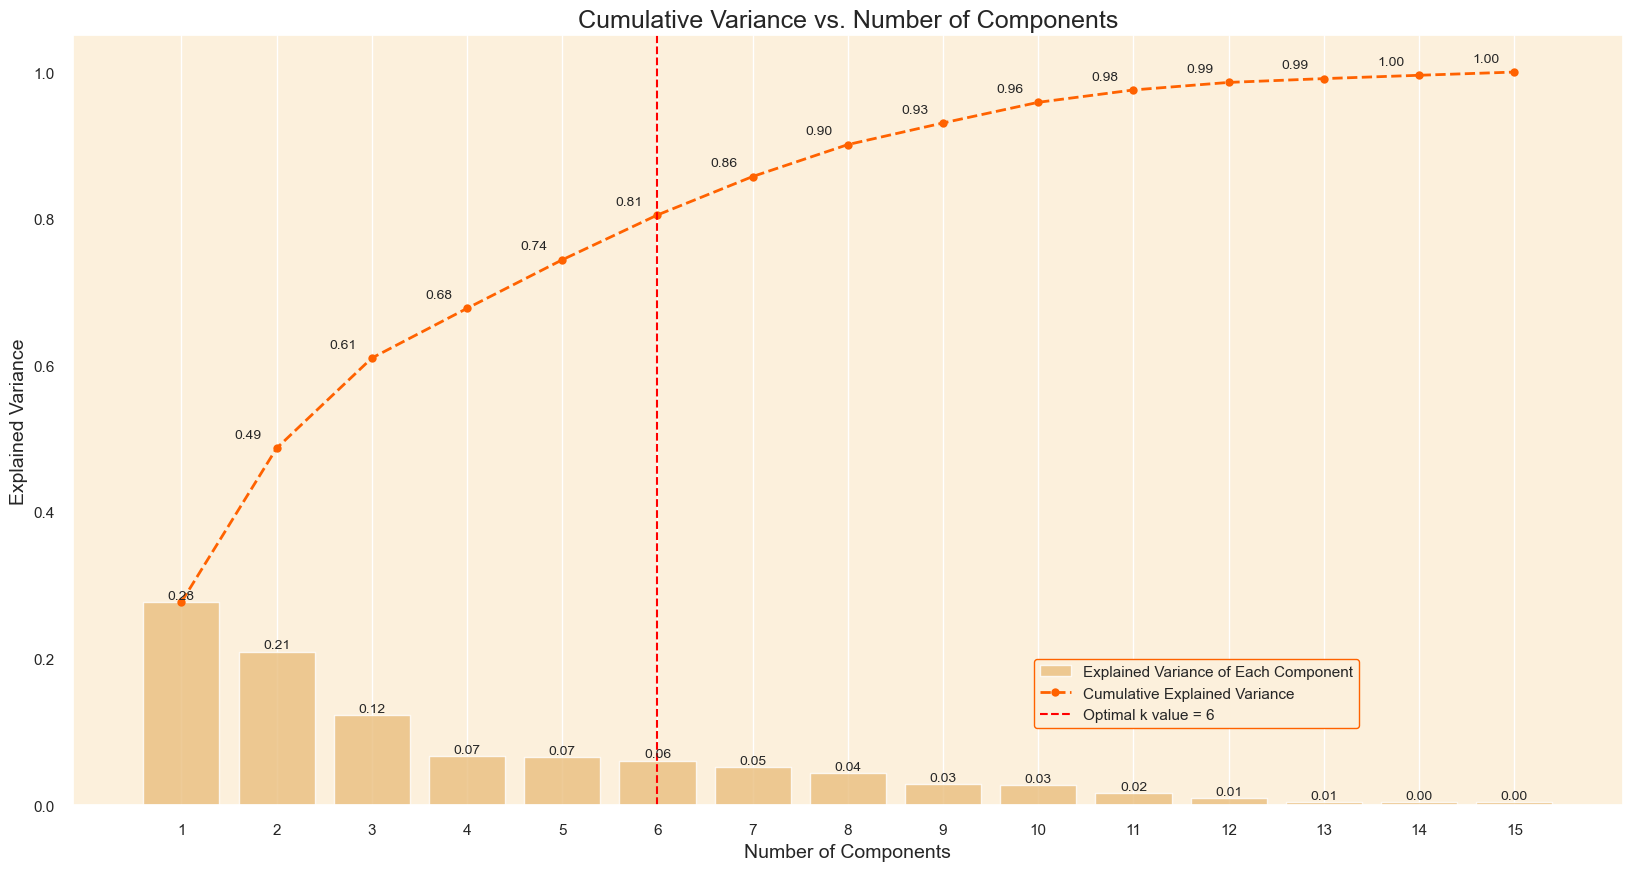

In [106]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

## Conclusion

The plot and the cumulative explained variance values indicate how much of the total variance in the dataset is captured by each principal component, as well as the cumulative variance explained by the first n components.

Here, we can observe that:

- The first component explains approximately 28% of the variance.
- The first two components together explain about 49% of the variance.
- The first three components explain approximately 61% of the variance, and so on.

To choose the optimal number of components, we generally look for a point where adding another component doesn't significantly increase the cumulative explained variance, often referred to as the "elbow point" in the curve.

From the plot, we can see that the increase in cumulative variance starts to slow down after the 6th component (which captures about 81% of the total variance).

Considering the context of customer segmentation, we want to retain a sufficient amount of information to identify distinct customer groups effectively. Therefore, retaining the first 6 components might be a balanced choice, as they together explain a substantial portion of the total variance while reducing the dimensionality of the dataset.


In [108]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [109]:
# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6
CustomerID                                                            
12346.0    -2.186469 -1.705370 -1.576745 -1.008187 -0.411803 -1.658012
12347.0     3.290264 -1.387375  1.923310  0.930990 -0.010591  0.873150
12348.0     0.584684  0.585019  0.664727  0.655411 -0.470280  2.306657
12349.0     1.791116 -2.695652  5.850040 -0.853418  0.677111 -1.520098
12350.0    -1.997139 -0.542639  0.578781 -0.183682 -1.484838  0.062672

Now, let's extract the coefficients corresponding to each principal component to better understand the transformation performed by PCA:

In [111]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

## Step 9 | K-Means Clustering

### K-Means:

K-Means is an unsupervised machine learning algorithm that clusters data into a specified number of groups (K) by minimizing the within-cluster sum-of-squares (WCSS), also known as inertia. The algorithm iteratively assigns each data point to the nearest centroid, then updates the centroids by calculating the mean of all assigned points. The process repeats until convergence or a stopping criterion is reached.

---

### Drawbacks of K-Means:

Here are the main drawbacks of the K-means clustering algorithm and their corresponding solutions:

1. **Inertia is influenced by the number of dimensions**:  
   The value of inertia tends to increase in high-dimensional spaces due to the curse of dimensionality, which can distort the Euclidean distances between data points.  
   **Solution**: Performing dimensionality reduction, such as PCA, before applying K-means to alleviate this issue and speed up computations.

2. **Dependence on Initial Centroid Placement**:  
   The K-means algorithm might find a local minimum instead of a global minimum, based on where the centroids are initially placed.  
   **Solution**: To enhance the likelihood of locating the global minimum, we can employ the k-means++ initialization method.

3. **Requires specifying the number of clusters**:  
   K-means requires specifying the number of clusters (K) beforehand, which may not be known in advance.  
   **Solution**: Using methods such as the elbow method and silhouette analysis to estimate the optimal number of clusters.

4. **Sensitivity to unevenly sized or sparse clusters**:  
   K-means might struggle with clusters of different sizes or densities.  
   **Solution**: Increasing the number of random initializations (n_init) or consider using algorithms that handle unevenly sized clusters better, like GMM or DBSCAN.

5. **Assumes convex and isotropic clusters**:  
   K-means assumes that clusters are spherical and have similar variances, which is not always the case. It may struggle with elongated or irregularly shaped clusters.  
   **Solution**: Considering using clustering algorithms that do not make these assumptions, such as DBSCAN or Gaussian Mixture Model (GMM).


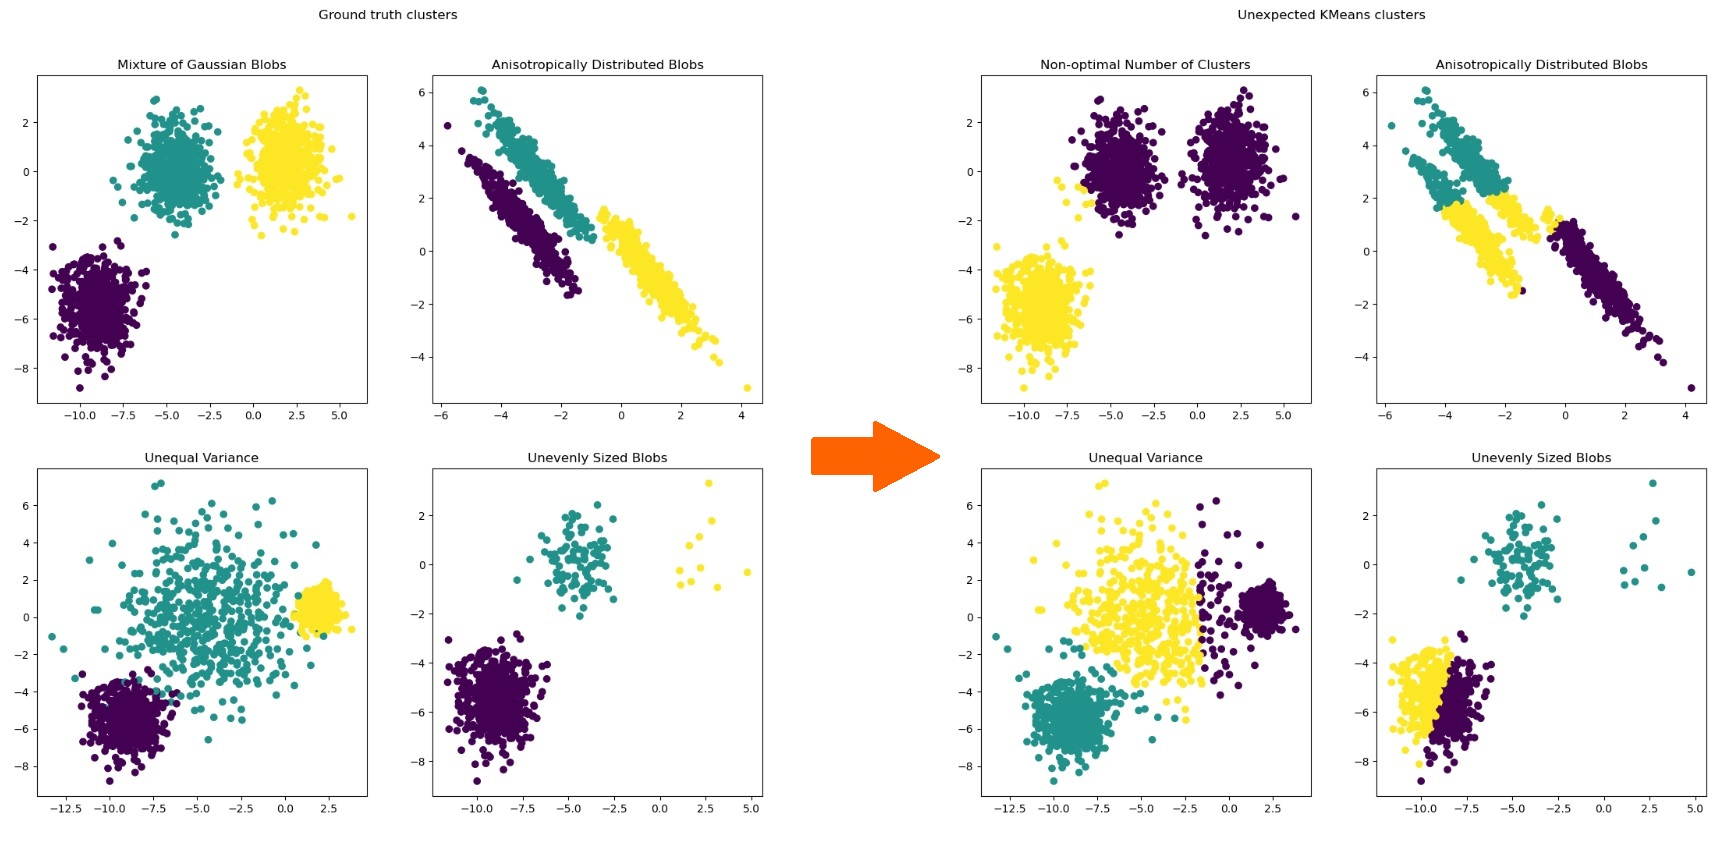

Taking into account the aforementioned considerations, I initially applied PCA to the dataset. For the KMeans algorithm, I will set the `init` parameter to `k-means++` and `n_init` to `10`. To determine the optimal number of clusters, I will employ the elbow method and silhouette analysis. Additionally, it might be beneficial to explore the use of alternative clustering algorithms such as GMM and DBSCAN in future analyses to potentially enhance the segmentation results.

---

## Step 9.1 | Determining the Optimal Number of Clusters

To ascertain the optimal number of clusters (k) for segmenting customers, I will explore two renowned methods:

- Elbow Method  
- Silhouette Method

It's common to utilize both methods in practice to corroborate the results.

---

## Step 9.1.1 | Elbow Method

### What is the Elbow Method?

The Elbow Method is a technique for identifying the ideal number of clusters in a dataset. It involves iterating through the data, generating clusters for various values of `k`. The k-means algorithm calculates the sum of squared distances between each data point and its assigned cluster centroid, known as the inertia or WCSS score. By plotting the inertia score against the `k` value, we create a graph that typically exhibits an elbow shape, hence the name "Elbow Method". The elbow point represents the `k`-value where the reduction in inertia achieved by increasing `k` becomes negligible, indicating the optimal stopping point for the number of clusters.

---

### Utilizing the YellowBrick Library

In this section, I will employ the YellowBrick library to facilitate the implementation of the Elbow method. YellowBrick, an extension of the Scikit-Learn API, is renowned for its ability to rapidly generate insightful visualizations in the field of machine learning.

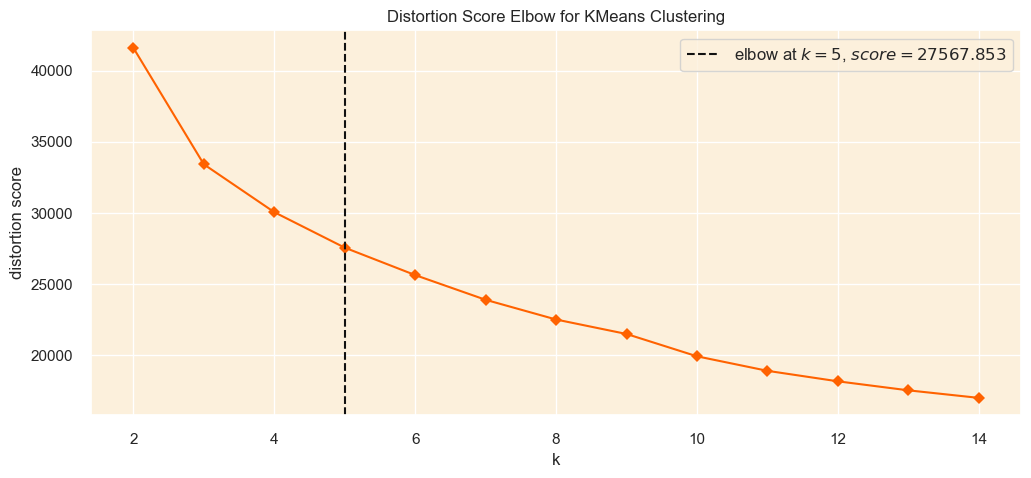

In [115]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customer_data_pca)

# Finalize and render the figure
visualizer.show();

## Optimal k Value: Elbow Method Insights

The optimal value of k for the KMeans clustering algorithm can be found at the elbow point. Using the YellowBrick library for the Elbow method, we observe that the suggested optimal k value is **5**. However, we don't have a very distinct elbow point in this case, which is common in real-world data. From the plot, we can see that the inertia continues to decrease significantly up to k=5, indicating that the optimum value of k could be between **3 and 7**. To choose the best k within this range, we can employ the **silhouette analysis**, another cluster quality evaluation method. Additionally, incorporating **business insights** can help determine a practical k value.

---

## Step 9.1.2 | Silhouette Method

### What is the Silhouette Method?

The Silhouette Method is an approach to find the optimal number of clusters in a dataset by evaluating the consistency within clusters and their separation from other clusters. It computes the **silhouette coefficient** for each data point, which measures how similar a point is to its own cluster compared to other clusters.

---

### What is the Silhouette Coefficient?

To determine the silhouette coefficient for a given point *i*, follow these steps:

1. **Calculate a(i)**: Compute the average distance between point *i* and all other points within its cluster.  
2. **Calculate b(i)**: Compute the average distance between point *i* and all points in the nearest cluster to its own.  
3. **Compute the silhouette coefficient**, *s(i)*, for point *i* using the following formula:

\[
s(i) = \frac{b(i) - a(i)}{\max(b(i), a(i))}
\]

**Note**: The silhouette coefficient quantifies the similarity of a point to its own cluster (**cohesion**) relative to its separation from other clusters. This value ranges from **-1 to 1**, with higher values signifying that the point is well aligned with its cluster and has a low similarity to neighboring clusters.

---

### What is the Silhouette Score?

The **silhouette score** is the average silhouette coefficient calculated for all data points in a dataset. It provides an **overall assessment of the clustering quality**, taking into account both cohesion within clusters and separation between clusters. A **higher silhouette score** indicates a better clustering configuration.

---

### What are the Advantages of Silhouette Method over the Elbow Method?

- The Silhouette Method evaluates **cluster quality** by considering both **cohesion** within clusters and their **separation** from other clusters. This provides a more comprehensive measure of clustering performance compared to the Elbow Method, which only considers the inertia (sum of squared distances within clusters).
  
- The Silhouette Method produces a **quantitative score** that directly reflects clustering quality, making it easier to **compare different values of k**. In contrast, the Elbow Method relies on the **subjective interpretation** of the elbow point, which can be ambiguous in unclear plots.

- The Silhouette Method generates a **visual representation** of silhouette coefficients for each data point, enabling easier detection of **fluctuations and outliers**. This helps in determining the optimal number of clusters with **greater confidence**, unlike the Elbow Method which depends solely on inertia.

---

### Methodology

In the following analysis:

- I will initially choose a range of **2–6** for the number of clusters *(k)* based on the Elbow method from the previous section.  
- Next, I will **plot Silhouette scores** for each k value to determine the one with the **highest score**.  
- Subsequently, to fine-tune the selection of the most appropriate k, I will **generate Silhouette plots** that visually display the silhouette coefficients for each data point within various clusters.  
- The **YellowBrick** library will be utilized once again to create these plots and facilitate a **comparative analysis**.


In [117]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))
             

    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

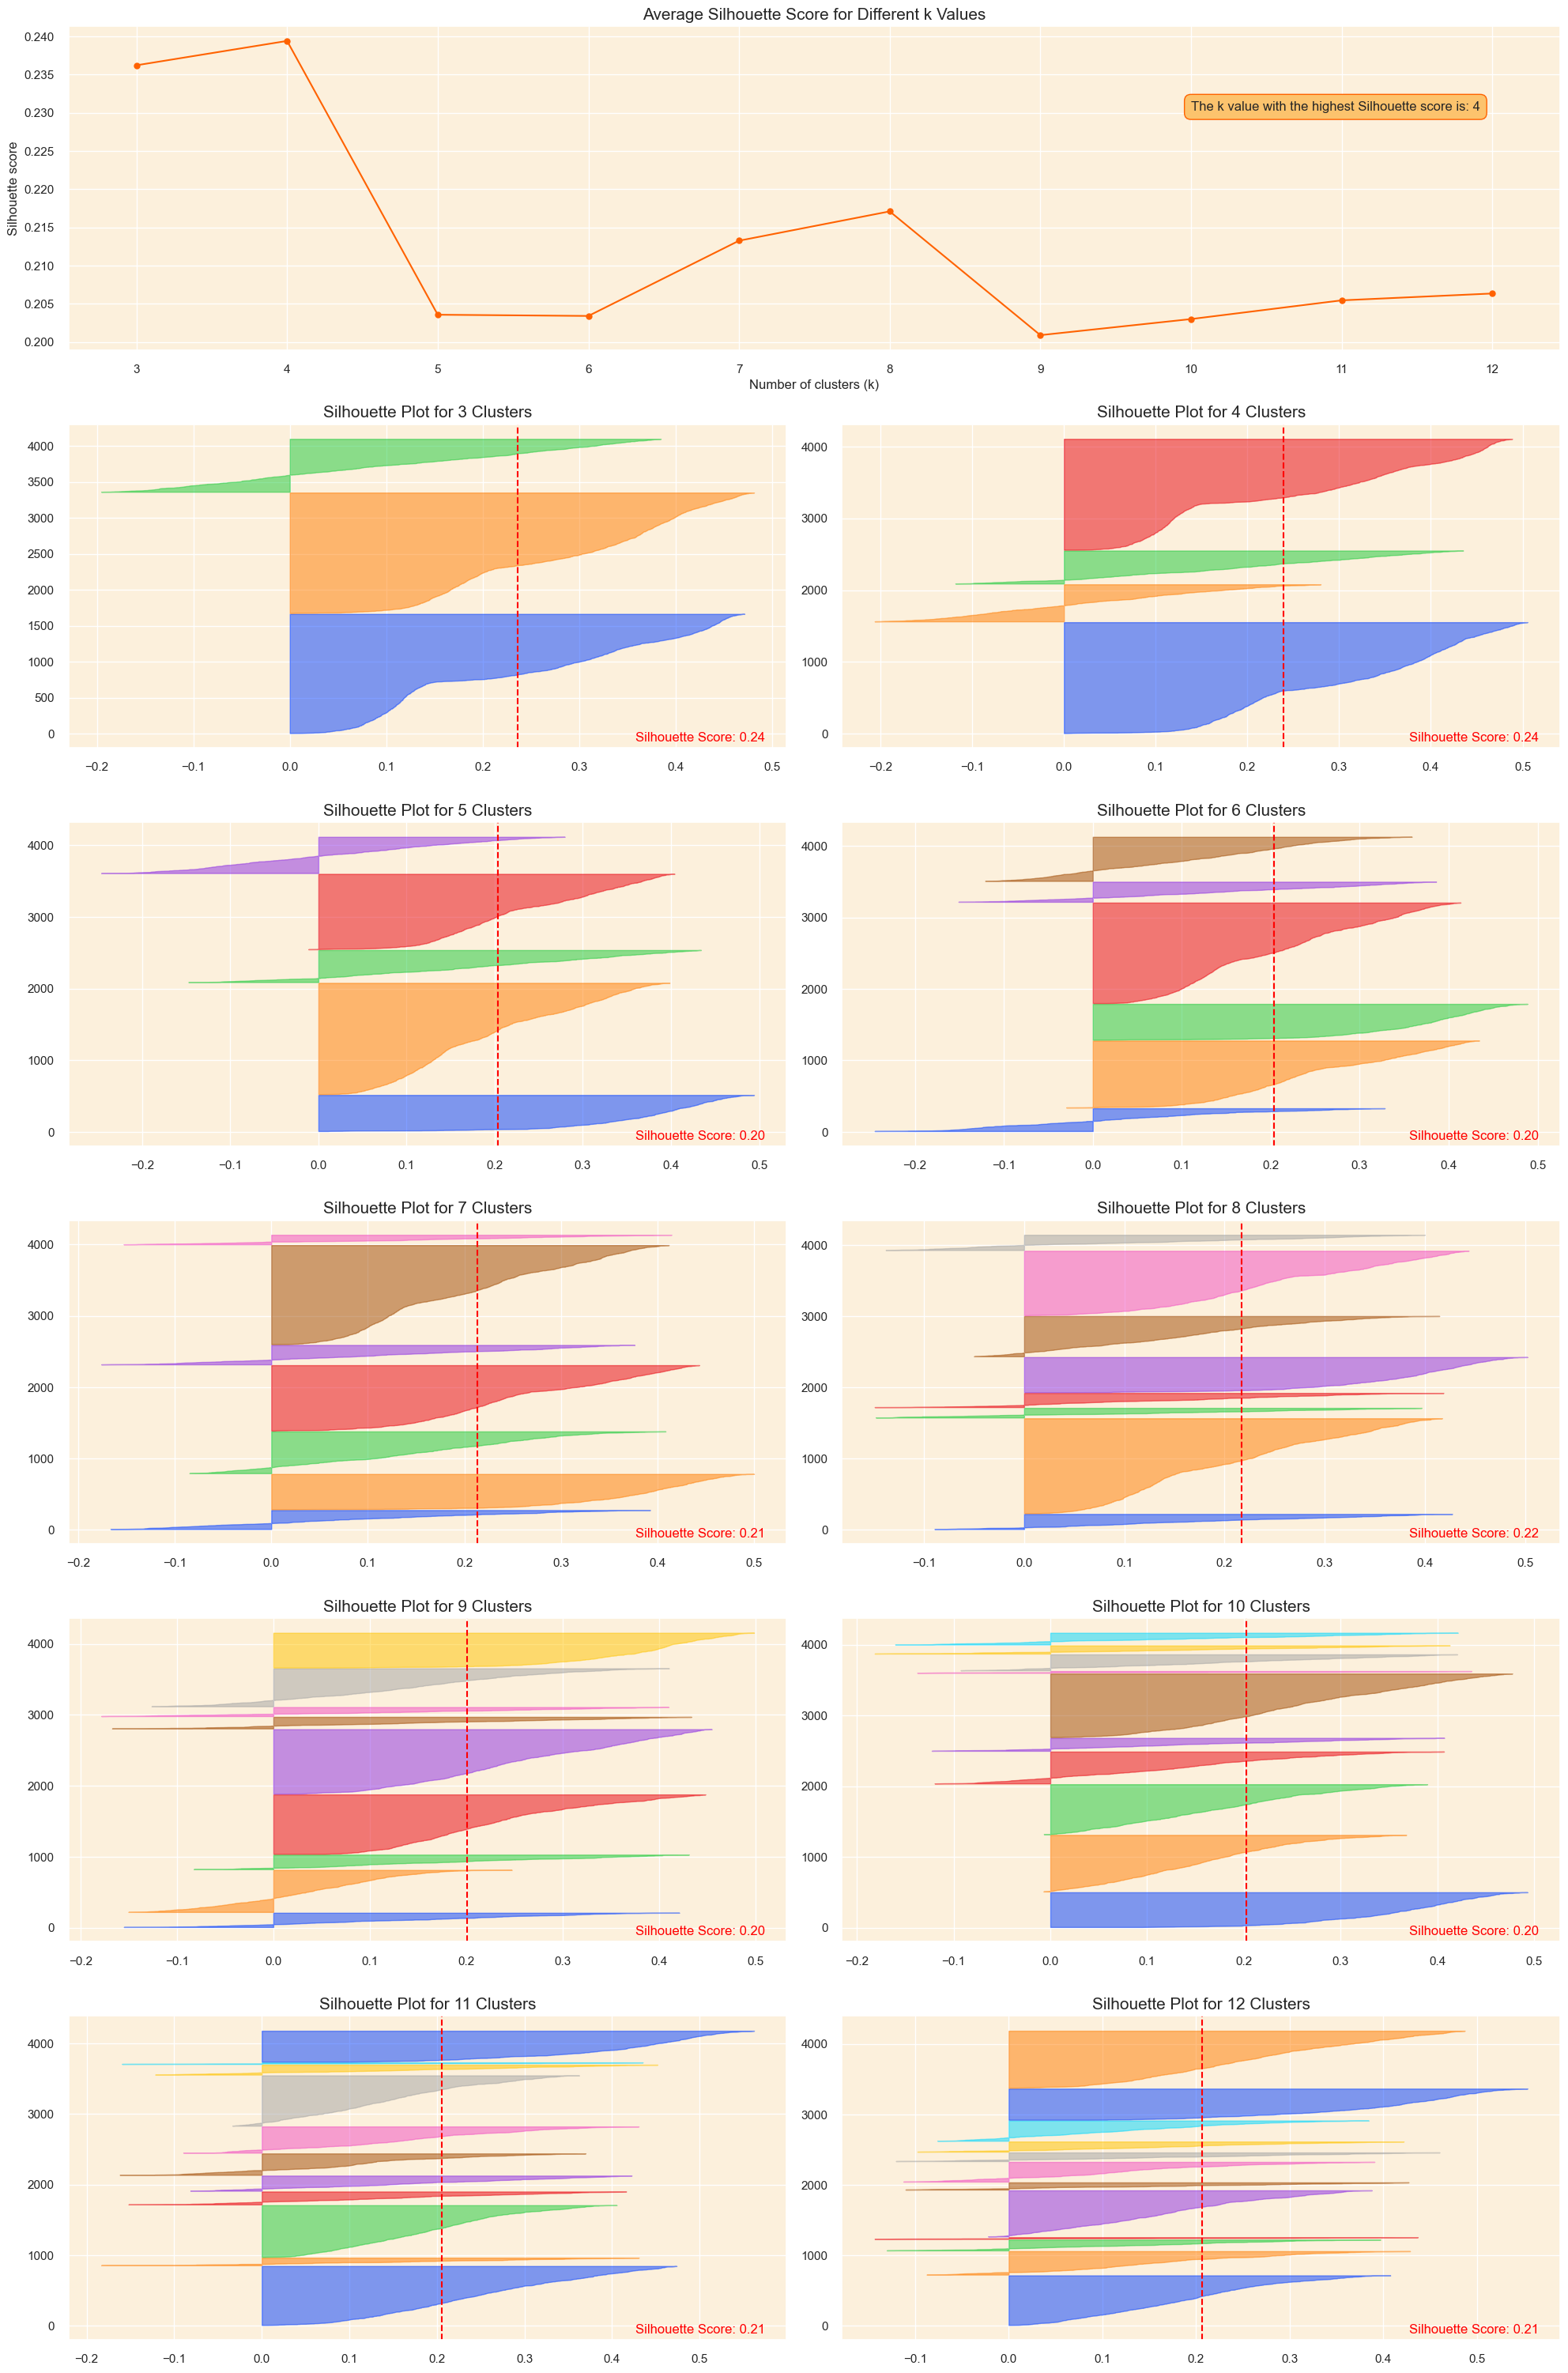

In [118]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

## Guidelines to Interpret Silhouette Plots and Determine the Optimal K

To interpret silhouette plots and identify the optimal number of clusters (k), consider the following criteria:

---

### 1. Analyze the Silhouette Plots

**Silhouette Score Width**:  
- **Wide Widths (closer to +1)**: Indicate that the data points in the cluster are well separated from points in other clusters, suggesting well-defined clusters.  
- **Narrow Widths (closer to -1)**: Show that data points in the cluster are not distinctly separated from other clusters, indicating poorly defined clusters.  

**Average Silhouette Score**:  
- **High Average Width**: A cluster with a high average silhouette score indicates well-separated clusters.  
- **Low Average Width**: A cluster with a low average silhouette score indicates poor separation between clusters.  

---

### 2. Uniformity in Cluster Size

**2.1 Cluster Thickness**:  
- **Uniform Thickness**: Indicates that clusters have a roughly equal number of data points, suggesting a balanced clustering structure.  
- **Variable Thickness**: Signifies an imbalance in the data point distribution across clusters, with some clusters having many data points and others too few.  

---

### 3. Peaks in Average Silhouette Score

- **Clear Peaks**: A clear peak in the average silhouette score plot for a specific (k) value indicates this (k) might be optimal.  

---

### 4. Minimize Fluctuations in Silhouette Plot Widths

- **Uniform Widths**: Seek silhouette plots with similar widths across clusters, suggesting a more balanced and optimal clustering.  
- **Variable Widths**: Avoid wide fluctuations in silhouette plot widths, indicating that clusters are not well-defined and may vary in compactness.  

---

### 5. Optimal Cluster Selection

- **Maximize the Overall Average Silhouette Score**: Choose the (k) value that gives the highest average silhouette score across all clusters, indicating well-defined clusters.  
- **Avoid Below-Average Silhouette Scores**: Ensure most clusters have above-average silhouette scores to prevent suboptimal clustering structures.  

---

### 6. Visual Inspection of Silhouette Plots

- **Consistent Cluster Formation**: Visually inspect the silhouette plots for each (k) value to evaluate the consistency and structure of the formed clusters.  
- **Cluster Compactness**: Look for more compact clusters, with data points having silhouette scores closer to +1, indicating better clustering.  

---

## Optimal k Value: Silhouette Method Insights

Based on the above guidelines and after carefully considering the silhouette plots, it's clear that choosing **k = 3** is the better option. This choice gives us clusters that are more evenly matched and well-defined, making our clustering solution stronger and more reliable.

---

## Step 9.2 | Clustering Model - K-means

In this step, I am going to apply the **K-means clustering algorithm** to segment customers into different clusters based on their purchasing behaviors and other characteristics, using the **optimal number of clusters** determined in the previous step.

It's important to note that the K-means algorithm might assign different labels to the clusters in each run. To address this, we have taken an additional step to **swap the labels based on the frequency of samples** in each cluster, ensuring a consistent label assignment across different runs.


In [120]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

In [121]:
# Display the first few rows of the original dataframe
customer_data_cleaned.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12346.0                       325                   2   
1    12347.0                         2                   7   
2    12348.0                        75                   4   
3    12349.0                        18                   1   
4    12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0          0.0                        0.0   
1                      2458       4310.0                 615.714286   
2                      2332      1437.24                     359.31   
3                       630      1457.55                    1457.55   
4                       196        294.4                      294.4   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                             0.0            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                             0.0            0   
4                         16                             0.0            2   

   Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0    10      1                       1                0.5   
1    14      0                       0                0.0   
2    19      0                       0                0.0   
3     9      0                       0                0.0   
4    16      0                       0                0.0   

   Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  cluster  
0                    0.0                   0.0             0.0        2  
1             615.714286            341.070789        4.486071        0  
2                 359.31            203.875689        -100.884        1  
3                1457.55                   0.0             0.0        2  
4                  294.4                   0.0             0.0        2

## Step 10 | Clustering Evaluation

After determining the optimal number of clusters (which is 3 in our case) using elbow and silhouette analyses, I move onto the evaluation step to assess the quality of the clusters formed. This step is essential to validate the effectiveness of the clustering and to ensure that the clusters are coherent and well-separated. The evaluation metrics and a visualization technique I plan to use are outlined below:

### Techniques Used for Evaluation:

1. **3D Visualization of Top PCs**  
2. **Cluster Distribution Visualization**  
3. **Evaluation Metrics**
   - Silhouette Score  
   - Calinski Harabasz Score  
   - Davies Bouldin Score  

> **Note:** We are using the PCA version of the dataset for evaluation because this is the space where the clusters were actually formed, capturing the most significant patterns in the data. Evaluating in this space ensures a more accurate representation of the cluster quality, helping us understand the true cohesion and separation achieved during clustering. This approach also aids in creating a clearer 3D visualization using the top principal components, illustrating the actual separation between clusters.

---

## Step 10.1 | 3D Visualization of Top Principal Components

In this part, I am going to choose the top 3 PCs (which capture the most variance in the data) and use them to create a 3D visualization. This will allow us to visually inspect the quality of separation and cohesion of clusters to some extent:


In [123]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

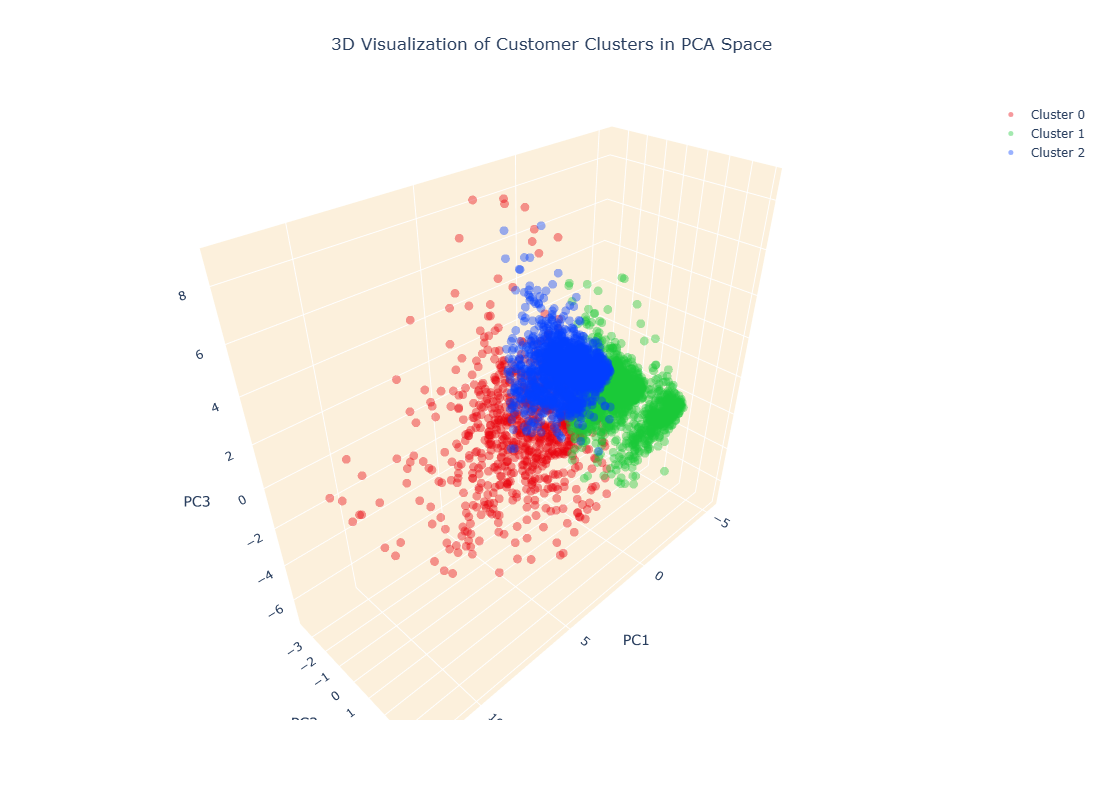

In [124]:
# Create separate data frames for each cluster
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

### Step 10.2 | Cluster Distribution Visualization

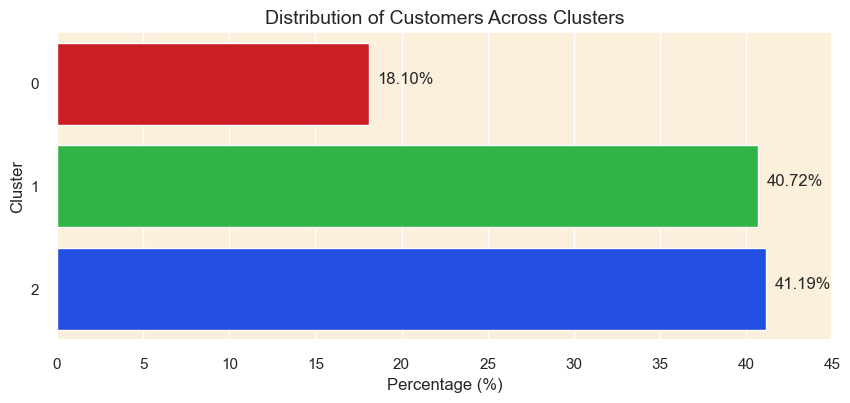

In [126]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

### Inference  
The distribution of customers across the clusters, as depicted by the bar plot, suggests a moderately imbalanced distribution with clusters 1 and 2 holding around 41% of customers each, while cluster 0 accommodates approximately 18% of the customers.

This distribution still indicates that our clustering process has successfully identified meaningful patterns within the data, rather than merely grouping noise or outliers. Clusters 1 and 2 clearly represent substantial and distinct segments of the customer base, offering valuable insights for future business strategies.

Although cluster 0 contains a smaller percentage of customers, its size is still significant enough to reflect a specific behavioral segment rather than just outliers. This setup enables a more targeted understanding and analysis of different customer types, facilitating effective and data-driven decision-making.
king.

## Step 10.3 | Evaluation Metrics

To further scrutinize the quality of our clustering, I will employ the following metrics:

- **Silhouette Score**:  
  A measure to evaluate the separation distance between the clusters. Higher values indicate better cluster separation. It ranges from -1 to 1.

- **Calinski Harabasz Score**:  
  This score is used to evaluate the dispersion between and within clusters. A higher score indicates better defined clusters.

- **Davies Bouldin Score**:  
  It assesses the average similarity between each cluster and its most similar cluster. Lower values indicate better cluster separation.


In [129]:
# Compute number of customers
num_observations = len(customer_data_pca)

# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |        4067         |
|    Silhouette Score     | 0.23622848017098869 |
| Calinski Harabasz Score | 1257.1747766540625  |
|  Davies Bouldin Score   |  1.368269537607467  |
+-------------------------+---------------------+


### Clustering Quality Inference

The **Silhouette Score** of approximately **0.236**, although not close to 1, still indicates a fair amount of separation between the clusters. It suggests that the clusters are somewhat distinct, but there might be slight overlaps between them. Generally, a score closer to 1 would be ideal, indicating more distinct and well-separated clusters.

The **Calinski Harabasz Score** is **1257.17**, which is considerably high, indicating that the clusters are well-defined. A higher score in this metric generally signals better cluster definitions, thus implying that our clustering has managed to find substantial structure in the data.

The **Davies Bouldin Score** of **1.37** is a reasonable score, indicating a moderate level of similarity between each cluster and its most similar one. A lower score is generally better as it indicates less similarity between clusters, and thus, our score here suggests a decent separation between the clusters.

**In conclusion**, the metrics suggest that the clustering is of good quality, with clusters being well-defined and fairly separated. However, there might still be room for further optimization to enhance cluster separation and definition, potentially by trying other clustering and dimensionality reduction algorithms.
ion algorithms.


## Step 11 | Cluster Analysis and Profiling

In this section, I am going to analyze the characteristics of each cluster to understand the distinct behaviors and preferences of different customer segments and also profile each cluster to identify the key traits that define the customers in each cluster.-##--

## Step 11.1 | Radar Chart Approach

First of all, I am going to create radar charts to visualize the centroid values of each cluster across different features. This can give a quick visual comparison of the profiles of different clusters.

To construct the radar charts, it's essential to first compute the **centroid for each cluster**. This centroid represents the mean value for all features within a specific cluster. Subsequently, I will display these centroids on the radar charts, facilitating a clear visualization of the central tendencies of each feature across the various clusters.

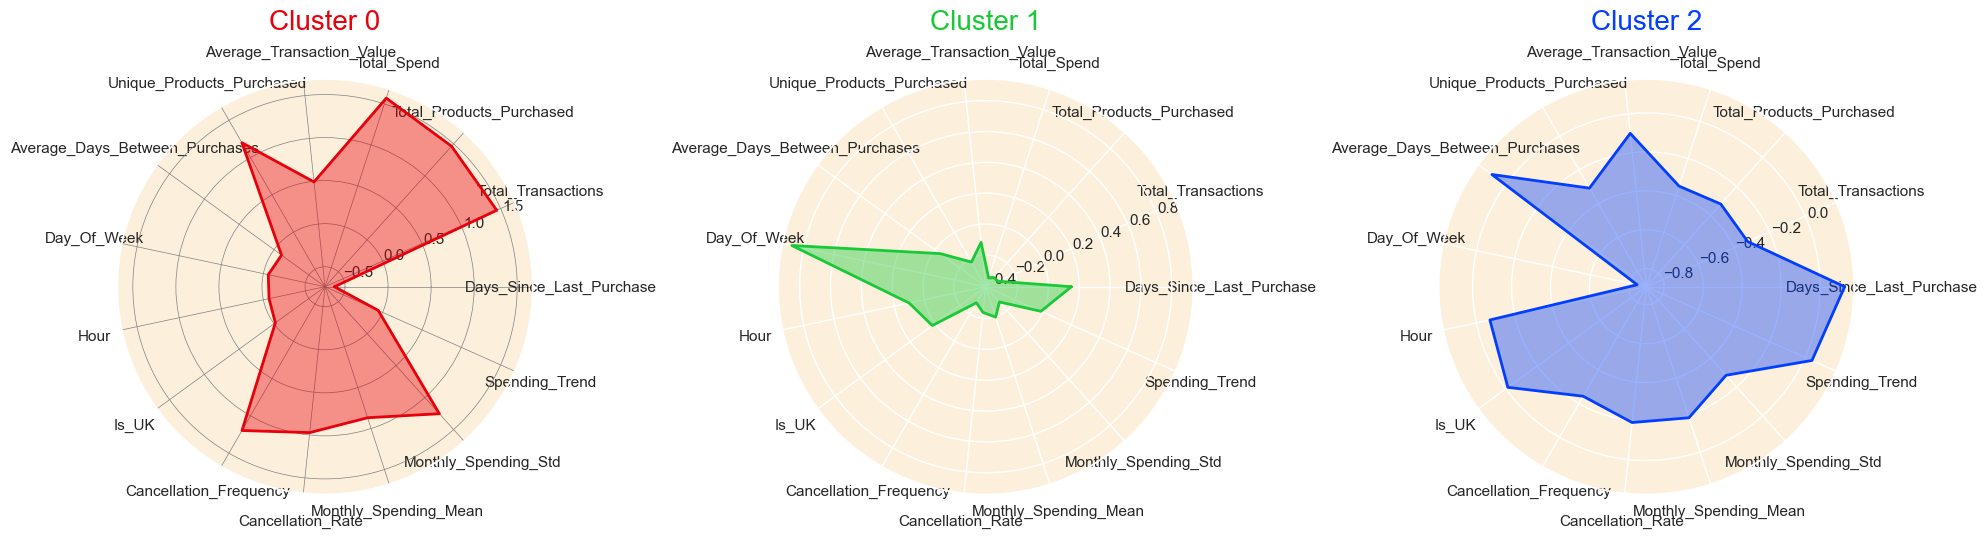

In [132]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = customer_data_cleaned.set_index('CustomerID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

## Customer Profiles Derived from Radar Chart Analysis

### Cluster 0 (Red Chart):
🎯 **Profile**: High-Spending, Diverse Buyers with Heavy Purchase Activity

- Customers in this cluster have **the highest total spend**, **number of transactions**, and **products purchased**.
- They buy a **wide variety of unique products** and tend to purchase frequently.
- Despite this, they show **low values for Days_Since_Last_Purchase**, indicating **recent activity**.
- Their **spending trend is moderate**, with **higher monthly spending**, but not much volatility (moderate Monthly_Spending_Std).
- They show **low average_days_between_purchases**, meaning they are **frequent repeat customers**.
- Their **cancellation frequency is slightly above average**, but not excessive.

---

### Cluster 1 (Green Chart):
🎯 **Profile**: Moderately Active Customers with UK Dominance

- These customers show **moderate values across most metrics**.
- Their **spending trend is slightly increasing**, and their **monthly spending is relatively stable**.
- They are the **most likely to reside in the UK**, with a strong presence in that region.
- The **Day_Of_Week** and **Hour** metrics suggest they have some time-specific shopping preferences (likely late or weekend shoppers).
- They have **moderate cancellation frequency and rate**, suggesting reliability in orders.
- While not top spenders, their **recency of purchases is decent**, keeping them **engaged**.

---

### Cluster 2 (Blue Chart):
🎯 **Profile**: Declining Shoppers with Irregular Patterns and High Cancellations

- Customers in this group have **low values for most key shopping metrics** like total spend, transactions, and products.
- They show **high Days_Since_Last_Purchase** and **high Average_Days_Between_Purchases**, indicating **inactivity**.
- Their **spending trend is declining**, and **monthly spending** (both mean and std) is relatively high, reflecting **inconsistency**.
- **High cancellation frequency and rate** suggest possible dissatisfaction or changing preferences.
- Their **purchase behavior shows signs of churn**, and they may need **targeted re-engagement strategies**.



### Step 11.2 | Histogram Chart Approachs

To validate the profiles identified from the radar charts, we can plot histograms for each feature segmented by the cluster labels. These histograms will allow us to visually inspect the distribution of feature values within each cluster, thereby confirming or refining the profiles we have created based on the radar charts.

- **Cluster 0 (Red)**: We expect to see **high values** in features like `Total_Spend`, `Total_Transactions`, `Total_Products_Purchased`, and `Unique_Products_Purchased`, supporting their profile as **frequent high spenders**.
- **Cluster 1 (Green)**: The distributions should mostly be **centered** or **moderate** across features, with **balanced behavior** and **UK-based shoppers**, confirming their role as **moderately active and consistent customers**.
- **Cluster 2 (Blue)**: Histograms are likely to show **low values** in most features but **higher values** in `Days_Since_Last_Purchase`, `Avg_Days_Between_Purchases`, and `Cancellation_Rate`, consistent with their label as **declining or churn-prone users**.

This visual breakdown complements the radar chart profiles and helps further validate customer segmentation for strategic decision-making.


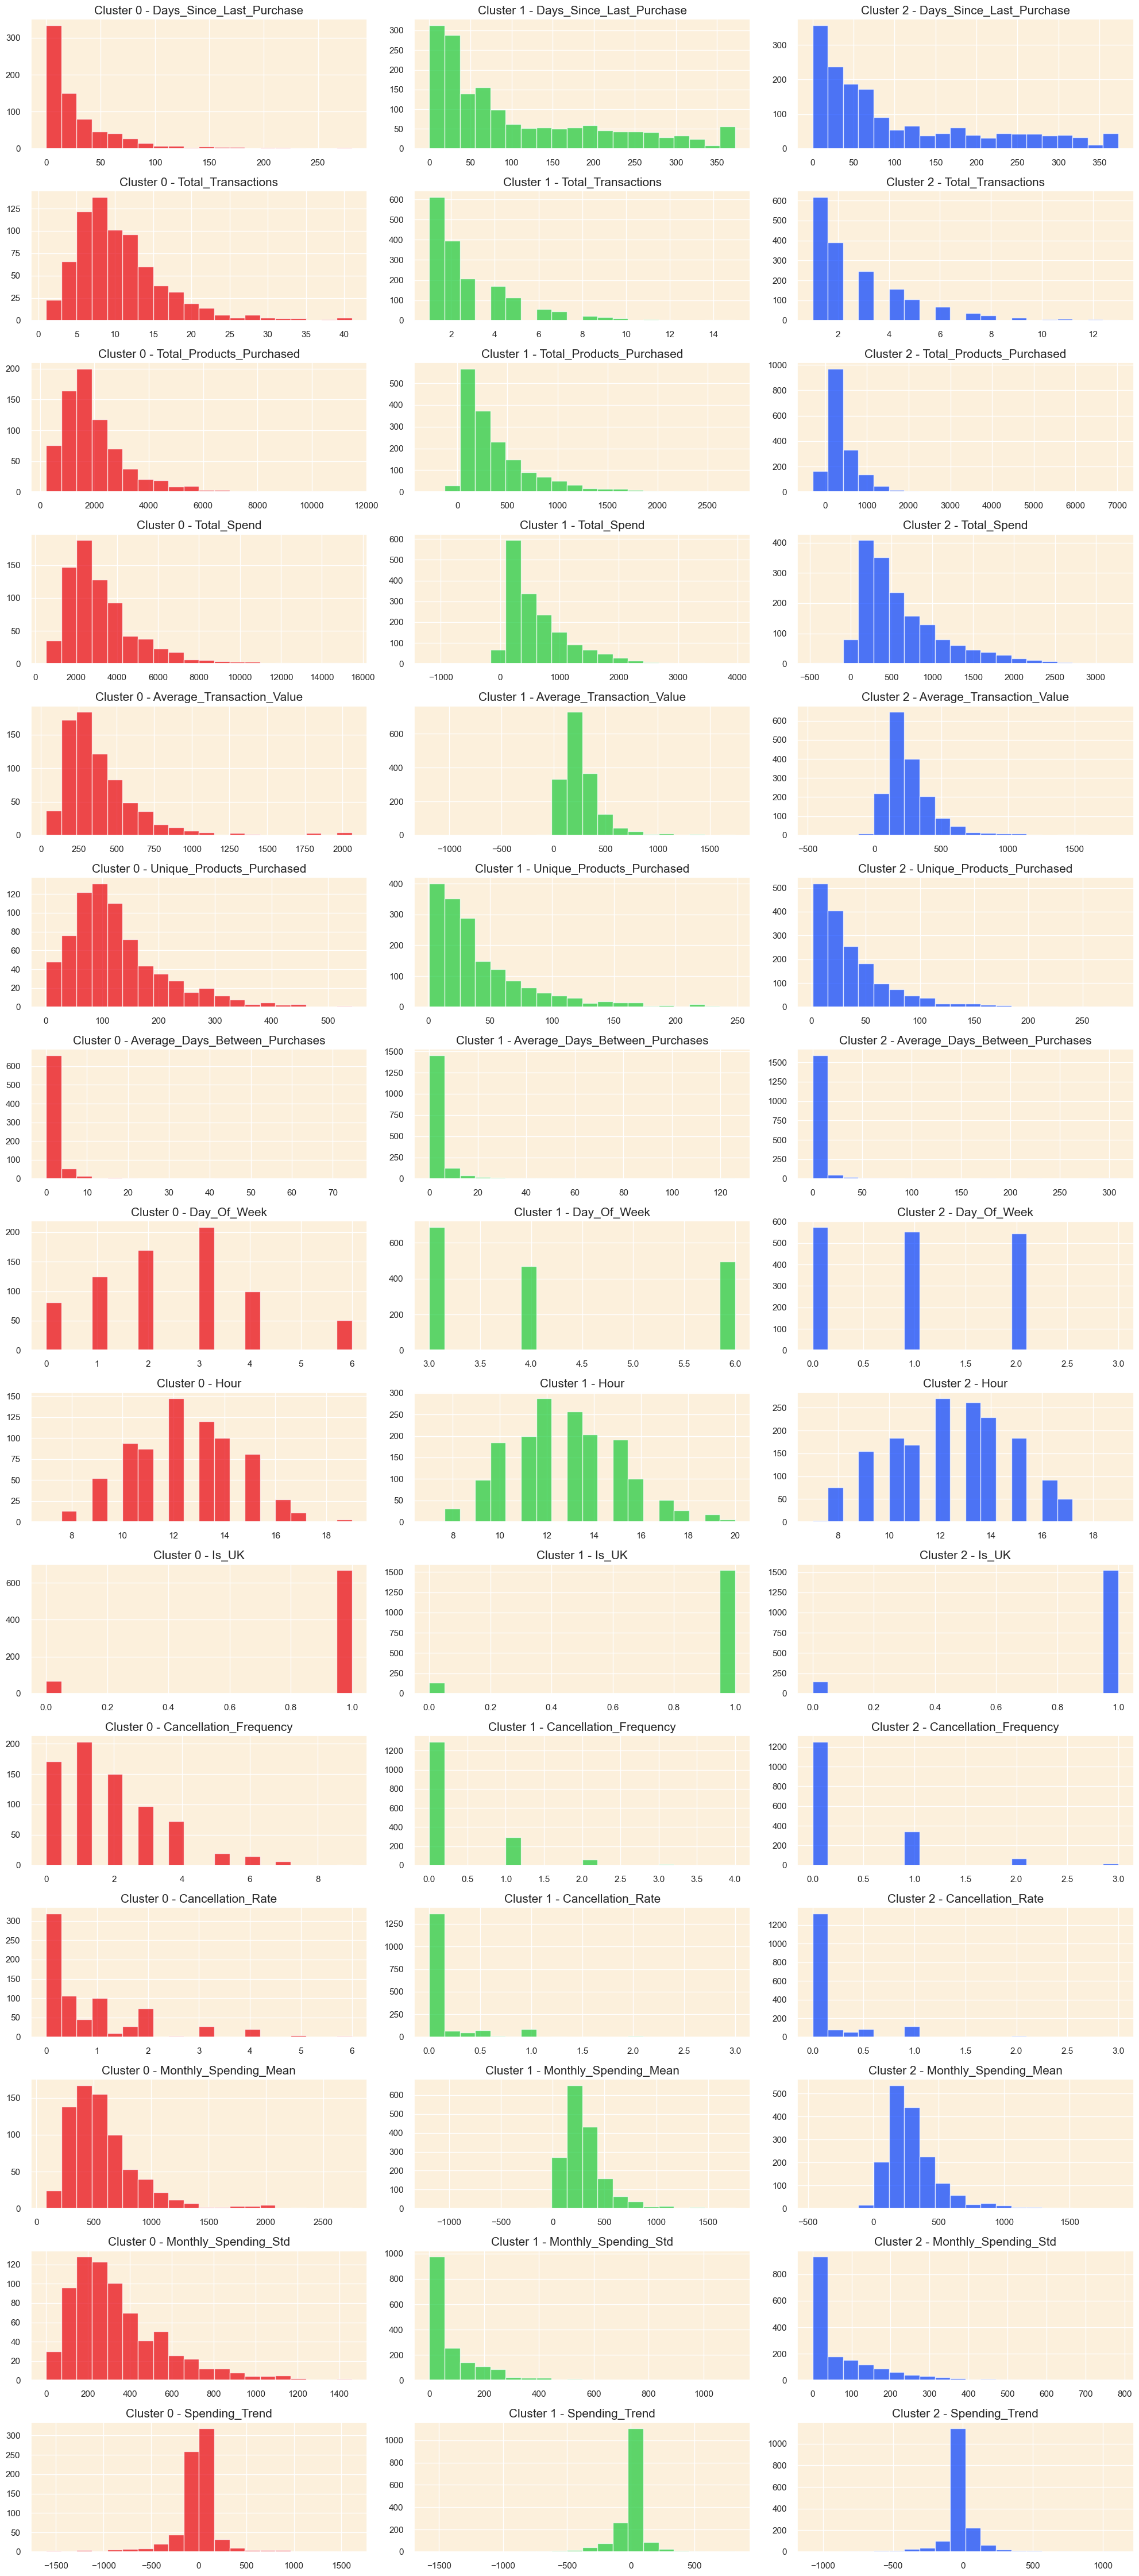

In [135]:
# Plot histograms for each feature segmented by the clusters
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

The detailed insights from the histograms provide a more nuanced understanding of each cluster, helping in refining the profiles to represent the customer behaviors more accurately. Based on the detailed analysis from both the radar charts and the histograms, here are the refined profiles and titles for each cluster:

### Cluster 0 – Occasional Big Spenders (18.10%)

Customers in this cluster shop infrequently, with fewer transactions and purchases compared to other clusters.  
However, they tend to spend a considerable amount when they do shop.  
Their spending trend is increasing, indicating rising interest or investment in shopping.  
They prefer shopping later in the day, likely after work hours.  
Most of them are based in the UK.  
They have a moderate cancellation rate, possibly due to high-value purchases being reconsidered.  
Their average transaction value is relatively high, and purchases often include premium or varied products.

---

### Cluster 1 – Eager Early-Bird Shoppers (40.72%)

These customers exhibit high spending and purchase a wide range of unique products.  
They shop frequently, with short intervals between purchases.  
They show a high cancellation frequency, possibly indicating impulsive buying behavior.  
Their shopping happens early in the day, possibly before daily responsibilities.  
Their monthly spending is highly variable, suggesting unpredictable spending patterns.  
Their spending trend is slightly declining, which could hint at changes in future behavior.

---

### Cluster 2 – Casual Weekend Shoppers (41.19%)

These customers shop regularly, but with a stable and moderate spending pattern.  
Their transaction value and total spend are lower compared to other clusters.  
They prefer shopping on weekends, possibly for leisure or routine purchases.  
Their monthly spending shows minimal variation, indicating consistent behavior.  
Low cancellation rates suggest they are decisive and intentional with purchases.  
They engage in a higher number of purchases, though individual transactions are modest in value.


### Step 12 | Recommendation System

In the final phase of this project, I am set to develop a recommendation system to enhance the online shopping experience. This system will suggest products to customers based on the purchasing patterns prevalent in their respective clusters. 

Earlier in the project, during the customer data preparation stage, I isolated a small fraction (5%) of the customers identified as outliers and reserved them in a separate dataset called `outliers_data`.

Now, focusing on the core 95% of the customer group, I analyze the cleansed customer data to pinpoint the top-selling products within each cluster. Leveraging this information, the system will craft personalized recommendations, suggesting the top three products popular within their cluster that they have not yet purchased. 

This not only facilitates targeted marketing strategies but also enriches the personal shopping experience, potentially boosting sales. For the outlier group, a basic approach could be to recommend random products, as a starting point to engage them.


In [138]:
# Step 1: Extract the CustomerIDs of the outliers and remove their transactions from the main dataframe
outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

# Step 2: Ensure consistent data type for CustomerID across both dataframes before merging
customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

# Step 3: Merge the transaction data with the customer data to get the cluster information for each transaction
merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

# Step 4: Identify the top 10 best-selling products in each cluster based on the total quantity sold
best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)

# Step 5: Create a record of products purchased by each customer in each cluster
customer_purchases = merged_data.groupby(['CustomerID', 'cluster', 'StockCode'])['Quantity'].sum().reset_index()

# Step 6: Generate recommendations for each customer in each cluster
recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']
    
    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) & 
                                                         (customer_purchases['cluster'] == cluster)]['StockCode'].tolist()
        
        # Find top 3 products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        
        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

# Step 7: Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')

In [139]:
# Display 10 random rows from the customer_data_with_recommendations dataframe
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=0)

Rec1_StockCode                     Rec1_Description Rec2_StockCode  \
CustomerID                                                                      
13243.0             84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS          84879   
13232.0             84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS          84879   
14997.0             18007  ESSENTIAL BALM 3.5G TIN IN ENVELOPE          84879   
14948.0             18007  ESSENTIAL BALM 3.5G TIN IN ENVELOPE          84879   
12596.0             18007  ESSENTIAL BALM 3.5G TIN IN ENVELOPE          84879   
16686.0             22616           PACK OF 12 LONDON TISSUES          85099B   
17101.0             18007  ESSENTIAL BALM 3.5G TIN IN ENVELOPE          84879   
14954.0             84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS          84879   
18123.0             18007  ESSENTIAL BALM 3.5G TIN IN ENVELOPE          84879   
14051.0             84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS         85099B   

                         Rec2_Description Rec3_StockCode  \
CustomerID                                                 
13243.0     ASSORTED COLOUR BIRD ORNAMENT          15036   
13232.0     ASSORTED COLOUR BIRD ORNAMENT          15036   
14997.0     ASSORTED COLOUR BIRD ORNAMENT          17003   
14948.0     ASSORTED COLOUR BIRD ORNAMENT          17003   
12596.0     ASSORTED COLOUR BIRD ORNAMENT          17003   
16686.0           JUMBO BAG RED RETROSPOT          84879   
17101.0     ASSORTED COLOUR BIRD ORNAMENT          17003   
14954.0     ASSORTED COLOUR BIRD ORNAMENT          15036   
18123.0     ASSORTED COLOUR BIRD ORNAMENT          17003   
14051.0           JUMBO BAG RED RETROSPOT          84879   

                         Rec3_Description  
CustomerID                                 
13243.0         ASSORTED COLOURS SILK FAN  
13232.0         ASSORTED COLOURS SILK FAN  
14997.0               BROCADE RING PURSE   
14948.0               BROCADE RING PURSE   
12596.0               BROCADE RING PURSE   
16686.0     ASSORTED COLOUR BIRD ORNAMENT  
17101.0               BROCADE RING PURSE   
14954.0         ASSORTED COLOURS SILK FAN  
18123.0               BROCADE RING PURSE   
14051.0     ASSORTED COLOUR BIRD ORNAMENT

In [213]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Transaction_Status',
       'InvoiceDay', 'Total_Spend', 'Day_Of_Week', 'Hour', 'Year', 'Month'],
      dtype='object')


In [217]:
print(customer_data_with_recommendations.columns)


Index(['CustomerID', 'Days_Since_Last_Purchase', 'Total_Transactions',
       'Total_Products_Purchased', 'Total_Spend', 'Average_Transaction_Value',
       'Unique_Products_Purchased', 'Average_Days_Between_Purchases',
       'Day_Of_Week', 'Hour', 'Is_UK', 'Cancellation_Frequency',
       'Cancellation_Rate', 'Monthly_Spending_Mean', 'Monthly_Spending_Std',
       'Spending_Trend', 'cluster', 'Rec1_StockCode', 'Rec1_Description',
       'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode',
       'Rec3_Description'],
      dtype='object')


In [219]:
cluster_summary = customer_data_with_recommendations.groupby('cluster')[['Days_Since_Last_Purchase', 'Total_Transactions', 'Total_Spend']].mean().round(2)
print(cluster_summary)


         Days_Since_Last_Purchase  Total_Transactions  Total_Spend
cluster                                                           
0                           30.12               10.13      3231.05
1                          106.79                2.67       634.77
2                          104.47                2.65       629.37


In [221]:
rfm_df = customer_data_with_recommendations.rename(columns={
    'Days_Since_Last_Purchase': 'Recency',
    'Total_Transactions': 'Frequency',
    'Total_Spend': 'Monetary'
})

cluster_summary = rfm_df.groupby('cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
print(cluster_summary)


         Recency  Frequency  Monetary
cluster                              
0          30.12      10.13   3231.05
1         106.79       2.67    634.77
2         104.47       2.65    629.37


### 📊 Final Cluster-wise RFM Summary

| Cluster | Recency (days) | Frequency (orders) | Monetary (spend £) | Segment Description |
|---------|----------------|--------------------|---------------------|---------------------|
| **0**   | 30.12          | 10.13              | 3231.05             | **Best Customers**: recent, frequent, and high-spending |
| **1**   | 106.79         | 2.67               | 634.77              | **At-Risk**: infrequent and inactive for a while |
| **2**   | 104.47         | 2.65               | 629.37              | **At-Risk**: similar to Cluster 1 |

#### 🎯 Insights:
- **Cluster 0** is your top customer segment. Consider loyalty programs or premium offers for them.
- **Clusters 1 & 2** show signs of churn. Target them with win-back strategies or discounts.


In [226]:
print(customer_data_with_recommendations.columns)


Index(['CustomerID', 'Days_Since_Last_Purchase', 'Total_Transactions',
       'Total_Products_Purchased', 'Total_Spend', 'Average_Transaction_Value',
       'Unique_Products_Purchased', 'Average_Days_Between_Purchases',
       'Day_Of_Week', 'Hour', 'Is_UK', 'Cancellation_Frequency',
       'Cancellation_Rate', 'Monthly_Spending_Mean', 'Monthly_Spending_Std',
       'Spending_Trend', 'cluster', 'Rec1_StockCode', 'Rec1_Description',
       'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode',
       'Rec3_Description'],
      dtype='object')


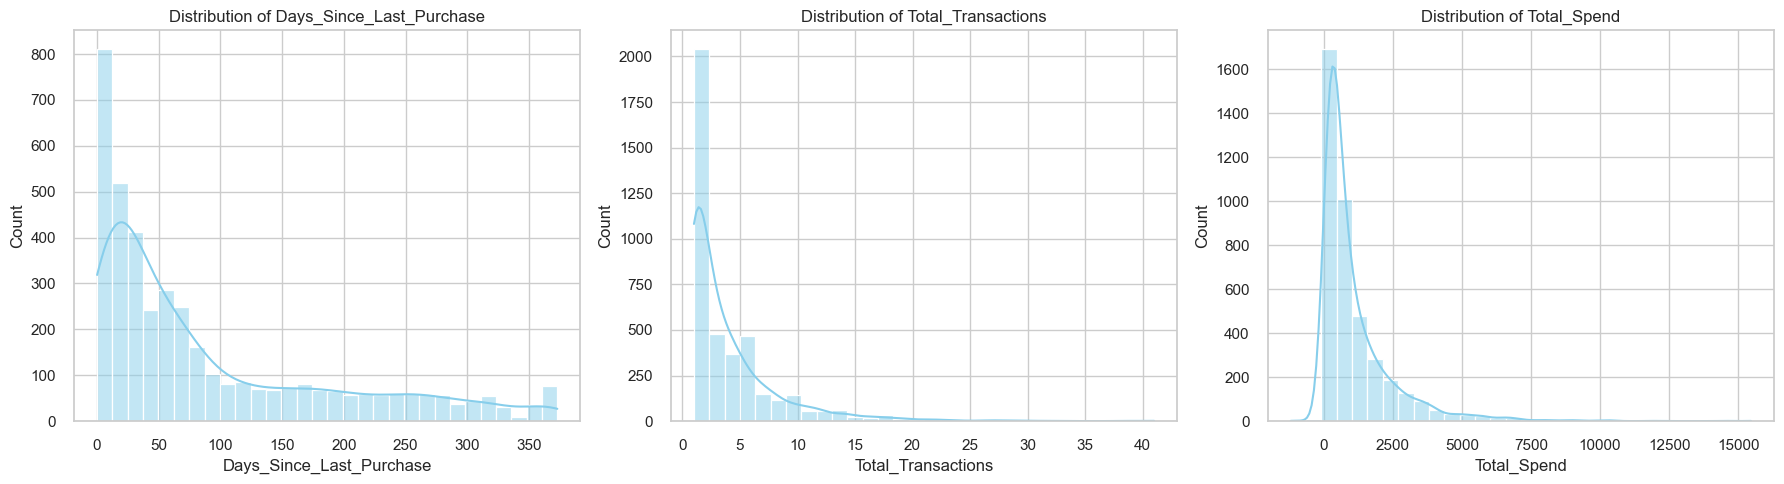

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

# Update RFM column names to match your DataFrame
rfm_columns = ['Days_Since_Last_Purchase', 'Total_Transactions', 'Total_Spend']

# Set up the figure
plt.figure(figsize=(18, 5))

# Create histogram with KDE for each
for i, col in enumerate(rfm_columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(customer_data_with_recommendations[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### 📊 RFM Feature Distributions

The histograms below illustrate the distribution of the three core RFM (Recency, Frequency, Monetary) features in our dataset:

#### 🕒 Recency (`Days_Since_Last_Purchase`)
- The majority of customers made their last purchase within the past **30 to 50 days**.
- There's a noticeable long tail, with some customers not purchasing for over **200 days**, indicating **inactive** or **one-time** buyers.

#### 🔁 Frequency (`Total_Transactions`)
- The distribution is **highly right-skewed**.
- Most customers made **1 to 3 transactions**, with a very small fraction crossing **10 or more**.
- This indicates that while loyal, frequent customers exist, they are **a minority**, yet likely very valuable.

#### 💰 Monetary (`Total_Spend`)
- The majority of customers spent **below 1,000 units** of currency.
- However, there are a few **high-value** customers spending up to **15,000+**, creating a **long-tail** distribution.
- These customers are potential **VIPs** and should be targeted for retention.

> These patterns help us identify different customer segments like active, inactive, loyal, or high-spending customers. They are essential for targeted marketing and personalized recommendation strategies.


In [235]:
whos

Variable                              Type                       Data/Info
--------------------------------------------------------------------------
Counter                               type                       <class 'collections.Counter'>
IsolationForest                       ABCMeta                    <class 'sklearn.ensemble.<...>iforest.IsolationForest'>
KElbowVisualizer                      type                       <class 'yellowbrick.clust<...>.elbow.KElbowVisualizer'>
KMeans                                ABCMeta                    <class 'sklearn.cluster._kmeans.KMeans'>
LinearSegmentedColormap               type                       <class 'matplotlib.colors<...>LinearSegmentedColormap'>
PCA                                   ABCMeta                    <class 'sklearn.decomposition._pca.PCA'>
SilhouetteVisualizer                  type                       <class 'yellowbrick.clust<...>te.SilhouetteVisualizer'>
StandardScaler                        type                 

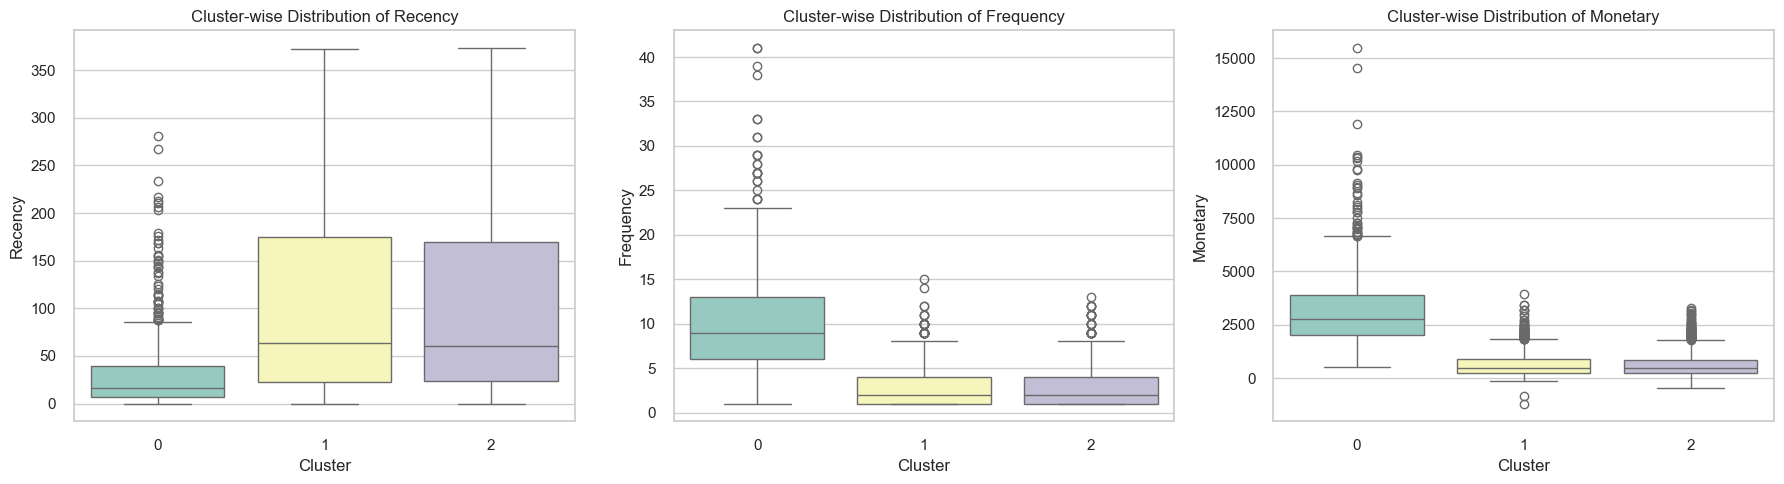

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select RFM-like features
rfm_features = ['Days_Since_Last_Purchase', 'Total_Transactions', 'Total_Spend']
titles = ['Recency', 'Frequency', 'Monetary']

plt.figure(figsize=(18, 5))
for i, feature in enumerate(rfm_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=customer_data_with_recommendations, x='cluster', y=feature, palette='Set3')
    plt.title(f'Cluster-wise Distribution of {titles[i]}')
    plt.xlabel('Cluster')
    plt.ylabel(titles[i])
plt.tight_layout()
plt.show()


### 📊 Cluster-wise RFM Feature Distribution

The boxplots below visually represent how each cluster behaves in terms of **Recency**, **Frequency**, and **Monetary value**:

#### 🔹 Cluster 0: High-Value Customers
- **Recency**: Very low, meaning they purchased recently and are active.
- **Frequency**: Very high, indicating they purchase often.
- **Monetary**: Very high spenders — they contribute the most revenue.

#### 🔹 Cluster 1: Churned or Low Engagement
- **Recency**: Very high — these customers haven't purchased in a long time.
- **Frequency**: Low number of transactions.
- **Monetary**: Low spenders — not much value generated.

#### 🔹 Cluster 2: Dormant or New/Irregular Customers
- **Recency**: Similar to Cluster 1 — they haven’t purchased recently.
- **Frequency**: Low, possibly indicating either churned or recently joined with few purchases.
- **Monetary**: Also low, contributing little revenue.

> 📌 **Conclusion**: Cluster 0 is your most valuable segment. Cluster 1 & 2 require reactivation campaigns or tailored promotions.


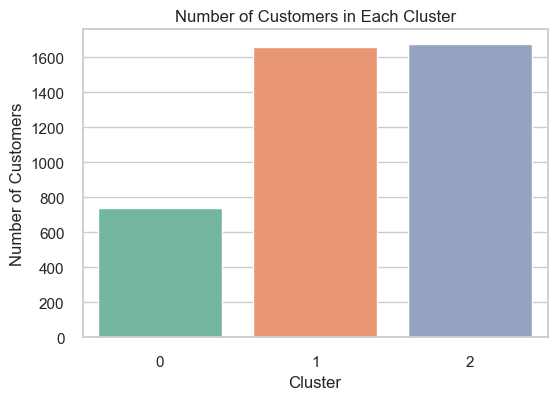

cluster
0     736
1    1656
2    1675
Name: count, dtype: int64


In [240]:
# Count of customers in each cluster
cluster_counts = customer_data_with_recommendations['cluster'].value_counts().sort_index()

# Visualizing
plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')
plt.title("Number of Customers in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

# Print exact numbers
print(cluster_counts)


### 👥 Cluster Size Analysis

The bar plot and count output show how customers are distributed among the three clusters:

| Cluster | Customer Count | Interpretation |
|---------|----------------|----------------|
| **0**   | 736            | 💎 High-value, loyal, and recent customers. Smallest group but most profitable. |
| **1**   | 1656           | 💤 Likely inactive or churned customers. High recency and low spend. |
| **2**   | 1675           | 🌱 Possibly new or infrequent buyers. Similar to Cluster 1 but might be recent joiners. |

> 🔍 **Insight:** Cluster 0, although the smallest, holds the most value. Clusters 1 and 2 make up the bulk and may require different marketing strategies like reactivation or onboarding campaigns.


         Days_Since_Last_Purchase  Total_Transactions  Total_Spend
cluster                                                           
0                           30.12               10.13      3231.05
1                          106.79                2.67       634.77
2                          104.47                2.65       629.37


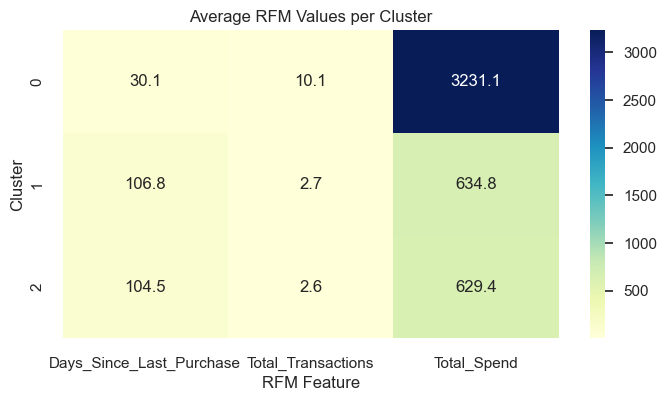

In [251]:
# Calculate cluster-wise average RFM values using mapped columns
# Recency → Days_Since_Last_Purchase
# Frequency → Total_Transactions
# Monetary → Total_Spend

cluster_rfm_means = customer_data_with_recommendations.groupby('cluster')[
    ['Days_Since_Last_Purchase', 'Total_Transactions', 'Total_Spend']
].mean().round(2)

# Display the RFM means
print(cluster_rfm_means)

# Convert to float to avoid dtype errors
cluster_rfm_means = cluster_rfm_means.astype(float)

# Optional: visualize using heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_rfm_means, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Average RFM Values per Cluster")
plt.ylabel("Cluster")
plt.xlabel("RFM Feature")
plt.show()



#### 📊 Interpreting the Cluster-Wise RFM Averages:

From the heatmap and the RFM summary:

| Cluster | Days_Since_Last_Purchase | Total_Transactions | Total_Spend |
|---------|---------------------------|---------------------|-------------|
|   0     |           30.1            |        10.1         |   3231.1    |
|   1     |          106.8            |         2.7         |    634.8    |
|   2     |          104.5            |         2.6         |    629.4    |

**Insights:**

- **Cluster 0 (Best Customers)**:
  - Very recent purchases (low recency value).
  - High frequency of purchases.
  - Very high total spending.
  - 👉 Likely represents loyal, high-value customers.

- **Cluster 1 & 2 (At-Risk or Low-Value Customers)**:
  - Long time since last purchase.
  - Low purchase frequency.
  - Low total spend.
  - 👉 Possibly lost, dormant, or infrequent shoppers.


In [258]:
# Define cluster labels based on RFM behavior
cluster_labels = {
    0: 'Best Customers',       # Recent, Frequent, High-Spending
    1: 'At Risk Customers',    # Infrequent, Low-Spending, Inactive
    2: 'Low Value Customers'   # Infrequent, Low-Spending, Inactive
}

# Map the labels to the DataFrame
customer_data_with_recommendations['Customer_Segment'] = customer_data_with_recommendations['cluster'].map(cluster_labels)

# Display sample
customer_data_with_recommendations[['CustomerID', 'cluster', 'Customer_Segment']].head()


CustomerID  cluster Customer_Segment
0     12347.0        0   Best Customers
1     12362.0        0   Best Customers
2     12370.0        0   Best Customers
3     12388.0        0   Best Customers
4     12395.0        0   Best Customers

#### 🧩 Cluster Labeling Output Explanation

After mapping the clusters to customer-friendly labels, we get:

| CustomerID | cluster | Customer_Segment  |
|------------|---------|-------------------|
| 12347.0    |    0    | Best Customers    |
| 12362.0    |    0    | Best Customers    |
| 12370.0    |    0    | Best Customers    |
| 12388.0    |    0    | Best Customers    |
| 12395.0    |    0    | Best Customers    |

**Insights:**

- These customers belong to **Cluster 0**, which, based on RFM values, represents:
  - High transaction frequency
  - Recent purchases
  - High total spend
- Hence, they've been labeled as **"Best Customers"**.
- Such segmentation helps target specific customer groups with personalized strategies (e.g., loyalty programs for best customers, win-back campaigns for at-risk ones).


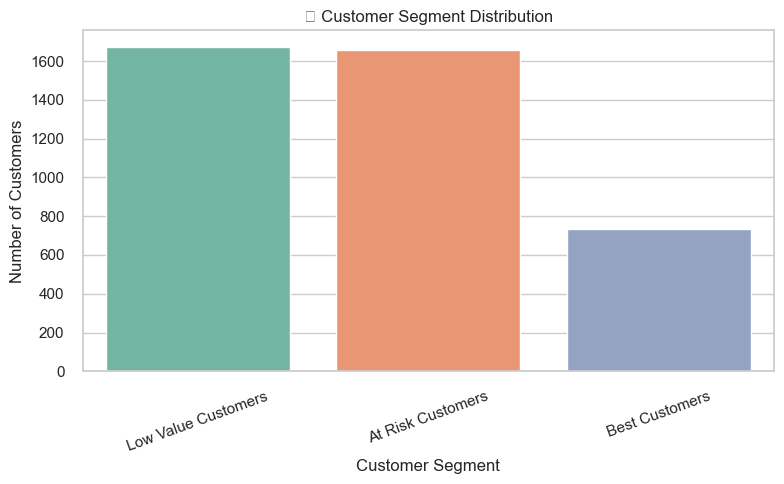

In [261]:
# Plot the distribution of customer segments
plt.figure(figsize=(8, 5))
sns.countplot(
    data=customer_data_with_recommendations,
    x='Customer_Segment',
    palette='Set2',
    order=customer_data_with_recommendations['Customer_Segment'].value_counts().index
)
plt.title('📦 Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


#### 📦 Customer Segment Distribution

The bar chart above illustrates the number of customers in each of the defined segments:

- **Low Value Customers** (~1670 customers):
  - Infrequent purchases
  - Low overall spending
  - Long time since last purchase

- **At Risk Customers** (~1650 customers):
  - Previously active but have not purchased recently
  - Low purchase frequency and spend in recent months

- **Best Customers** (~730 customers):
  - Most active and high-spending group
  - Recently purchased, frequent buyers, and high revenue generators

This segmentation helps in targeting marketing and retention strategies more effectively:
- **Retain Best Customers** with loyalty rewards
- **Re-engage At Risk Customers** with win-back offers
- **Educate or Upsell Low Value Customers** to increase engagement


In [264]:
# Assign recommendations based on customer segments
def get_recommendation(segment):
    if segment == "Best Customers":
        return "Offer loyalty rewards and early access to new products"
    elif segment == "At Risk Customers":
        return "Send personalized re-engagement emails with offers"
    elif segment == "Low Value Customers":
        return "Offer introductory discounts or product education"
    else:
        return "No recommendation"

# Apply the function to the dataset
customer_data_with_recommendations['Recommendation'] = customer_data_with_recommendations['Customer_Segment'].apply(get_recommendation)

# Preview the updated DataFrame
customer_data_with_recommendations[['CustomerID', 'Customer_Segment', 'Recommendation']].head()


CustomerID Customer_Segment  \
0     12347.0   Best Customers   
1     12362.0   Best Customers   
2     12370.0   Best Customers   
3     12388.0   Best Customers   
4     12395.0   Best Customers   

                                      Recommendation  
0  Offer loyalty rewards and early access to new ...  
1  Offer loyalty rewards and early access to new ...  
2  Offer loyalty rewards and early access to new ...  
3  Offer loyalty rewards and early access to new ...  
4  Offer loyalty rewards and early access to new ...

#### 🧠 Personalized Recommendations

Below is a sample of the final output which links each customer to their corresponding segment and a tailored business recommendation:

| CustomerID | Customer Segment  | Recommendation |
|------------|-------------------|----------------|
| 12347.0    | Best Customers    | Offer loyalty rewards and early access to new products |
| 12362.0    | Best Customers    | Offer loyalty rewards and early access to new products |
| 12370.0    | Best Customers    | Offer loyalty rewards and early access to new products |
| 12388.0    | Best Customers    | Offer loyalty rewards and early access to new products |
| 12395.0    | Best Customers    | Offer loyalty rewards and early access to new products |

This output helps businesses:
- 🏆 **Retain high-value customers** with exclusive perks  
- 💬 **Reconnect with inactive customers** using incentives  
- 🚀 **Nurture new or low-value customers** through discounts or engagement strategies

These recommendations are actionable and can be directly used in email campaigns, app notifications, or customer dashboard personalization.


In [269]:
# Build final summary table from the dataframe that has segment labels + recs
final_df = customer_data_with_recommendations[['CustomerID', 'Customer_Segment', 'Recommendation']].copy()

# Preview
final_df.head(10)

CustomerID Customer_Segment  \
0     12347.0   Best Customers   
1     12362.0   Best Customers   
2     12370.0   Best Customers   
3     12388.0   Best Customers   
4     12395.0   Best Customers   
5     12397.0   Best Customers   
6     12408.0   Best Customers   
7     12417.0   Best Customers   
8     12429.0   Best Customers   
9     12431.0   Best Customers   

                                      Recommendation  
0  Offer loyalty rewards and early access to new ...  
1  Offer loyalty rewards and early access to new ...  
2  Offer loyalty rewards and early access to new ...  
3  Offer loyalty rewards and early access to new ...  
4  Offer loyalty rewards and early access to new ...  
5  Offer loyalty rewards and early access to new ...  
6  Offer loyalty rewards and early access to new ...  
7  Offer loyalty rewards and early access to new ...  
8  Offer loyalty rewards and early access to new ...  
9  Offer loyalty rewards and early access to new ...

In [271]:
export_cols = [
    'CustomerID',
    'cluster',
    'Customer_Segment',
    'Days_Since_Last_Purchase',
    'Total_Transactions',
    'Total_Spend',
    'Recommendation',
    'Rec1_Description',
    'Rec2_Description',
    'Rec3_Description'
]

final_export = customer_data_with_recommendations[export_cols].copy()

# Save to CSV
final_export.to_csv("Customer_Segments_and_Recommendations.csv", index=False)
print("Saved file: Customer_Segments_and_Recommendations.csv  (rows:", len(final_export), ")")

# Show a few rows
final_export.head()


Saved file: Customer_Segments_and_Recommendations.csv  (rows: 4067 )


CustomerID  cluster Customer_Segment  Days_Since_Last_Purchase  \
0     12347.0        0   Best Customers                         2   
1     12362.0        0   Best Customers                         3   
2     12370.0        0   Best Customers                        51   
3     12388.0        0   Best Customers                        15   
4     12395.0        0   Best Customers                        15   

   Total_Transactions  Total_Spend  \
0                   7       4310.0   
1                  13      4665.58   
2                   4      3421.94   
3                   6      2780.66   
4                  15      2662.28   

                                      Recommendation  \
0  Offer loyalty rewards and early access to new ...   
1  Offer loyalty rewards and early access to new ...   
2  Offer loyalty rewards and early access to new ...   
3  Offer loyalty rewards and early access to new ...   
4  Offer loyalty rewards and early access to new ...   

             Rec1_Description                   Rec2_Description  \
0  PACK OF 12 LONDON TISSUES   WORLD WAR 2 GLIDERS ASSTD DESIGNS   
1  PACK OF 12 LONDON TISSUES   WORLD WAR 2 GLIDERS ASSTD DESIGNS   
2  PACK OF 12 LONDON TISSUES   WORLD WAR 2 GLIDERS ASSTD DESIGNS   
3  PACK OF 12 LONDON TISSUES   WORLD WAR 2 GLIDERS ASSTD DESIGNS   
4  PACK OF 12 LONDON TISSUES   WORLD WAR 2 GLIDERS ASSTD DESIGNS   

                Rec3_Description  
0        JUMBO BAG RED RETROSPOT  
1  ASSORTED COLOUR BIRD ORNAMENT  
2        JUMBO BAG RED RETROSPOT  
3        JUMBO BAG RED RETROSPOT  
4  ASSORTED COLOUR BIRD ORNAMENT

## 📊 Final Customer Segmentation Output

The final DataFrame (`Customer_Segments_and_Recommendations.csv`) contains **4,067 customers**, each enriched with actionable insights:

| Column | Description |
|--------|-------------|
| **CustomerID** | Unique identifier for each customer |
| **cluster** | Cluster label assigned by KMeans (0/1/2) |
| **Customer_Segment** | Human-readable label (e.g., Best Customers, At Risk) |
| **Days_Since_Last_Purchase** | Recency measure for RFM analysis |
| **Total_Transactions** | Frequency measure for RFM |
| **Total_Spend** | Monetary value spent by the customer |
| **Recommendation** | A marketing suggestion based on customer segment |
| **Rec1_Description** to **Rec3_Description** | Top 3 product recommendations for upselling |

---

### ✅ Example Output (Top 5 rows)

| CustomerID | Segment | Recency | Frequency | Monetary | Recommendation | Top Product |
|------------|---------|---------|-----------|----------|----------------|-------------|
| 12347.0 | Best Customers | 2 days | 7 | 4310.0 | Offer loyalty rewards and early access | PACK OF 12 LONDON TISSUES |
| 12362.0 | Best Customers | 3 days | 13 | 4665.58 | Offer loyalty rewards and early access | PACK OF 12 LONDON TISSUES |
| ... | ... | ... | ... | ... | ... | ... |

---

### 📁 Export File
- Filename: `Customer_Segments_and_Recommendations.csv`
- Rows: 4067
- Format: Ready for use in dashboards, CRMs, or AI-based personalization systems.



#### 💾 Final Export: Customer Segments & Recommendations

We created a clean deliverable that links each customer to:
- Their assigned **cluster**
- A human-readable **segment label** (Best, At Risk, Low Value)
- Key RFM metrics (Recency, Frequency, Monetary proxies)
- A **tactical recommendation** for targeted marketing
- Top 3 product suggestions (from earlier recommender logic)

This CSV (`Customer_Segments_and_Recommendations.csv`) can be:
- Shared with marketing / CRM teams
- Used to trigger campaigns (loyalty, win-back, upsell)
- Integrated into dashboards (Power BI / Tableau)
- Loaded into a Flask or Streamlit app for interactive exploration


In [278]:
# Check how many entries exist for CustomerID 17850
df[df["CustomerID"] == 17850.0]


InvoiceNo StockCode                          Description  Quantity  \
0        536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        536365     71053                  WHITE METAL LANTERN         6   
2        536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...         ...       ...                                  ...       ...   
54326   C543611     21071       VINTAGE BILLBOARD DRINK ME MUG        -6   
54327   C543611     82483   WOOD 2 DRAWER CABINET WHITE FINISH        -2   
54328   C543611     21874                    GIN AND TONIC MUG        -1   
54329   C543611     71477    COLOUR GLASS. STAR T-LIGHT HOLDER        -2   
54330   C543611     21169      YOU'RE CONFUSING ME METAL SIGN         -2   

              InvoiceDate  UnitPrice  CustomerID         Country  \
0     2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1     2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2     2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3     2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4     2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                   ...        ...         ...             ...   
54326 2011-02-10 14:38:00       1.06     17850.0  United Kingdom   
54327 2011-02-10 14:38:00       4.95     17850.0  United Kingdom   
54328 2011-02-10 14:38:00       1.06     17850.0  United Kingdom   
54329 2011-02-10 14:38:00       2.75     17850.0  United Kingdom   
54330 2011-02-10 14:38:00       1.45     17850.0  United Kingdom   

      Transaction_Status  InvoiceDay  Total_Spend  Day_Of_Week  Hour  Year  \
0              Completed  2010-12-01        15.30            2     8  2010   
1              Completed  2010-12-01        20.34            2     8  2010   
2              Completed  2010-12-01        22.00            2     8  2010   
3              Completed  2010-12-01        20.34            2     8  2010   
4              Completed  2010-12-01        20.34            2     8  2010   
...                  ...         ...          ...          ...   ...   ...   
54326          Cancelled  2011-02-10        -6.36            3    14  2011   
54327          Cancelled  2011-02-10        -9.90            3    14  2011   
54328          Cancelled  2011-02-10        -1.06            3    14  2011   
54329          Cancelled  2011-02-10        -5.50            3    14  2011   
54330          Cancelled  2011-02-10        -2.90            3    14  2011   

       Month  
0         12  
1         12  
2         12  
3         12  
4         12  
...      ...  
54326      2  
54327      2  
54328      2  
54329      2  
54330      2  

[309 rows x 15 columns]

In [284]:
final_export["CustomerID"].unique()


array([12347., 12362., 12370., ..., 18278., 18280., 18287.])

In [286]:
# Load the final exported CSV
df = pd.read_csv("Customer_Segments_and_Recommendations.csv")

# Get unique CustomerIDs and convert to integer (drop .0)
valid_ids = df['CustomerID'].dropna().astype(int).unique()

# Sort the IDs (optional)
valid_ids = sorted(valid_ids)

# Save to a txt file
with open("valid_customer_ids.txt", "w") as f:
    for cid in valid_ids:
        f.write(str(cid) + "\n")

print("Saved valid customer IDs to valid_customer_ids.txt")


Saved valid customer IDs to valid_customer_ids.txt
